Data analysis

In [1]:

# from envs.filtr_json_from_race import load_from_db
import sqlite3
import json
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def load_data_from_db():
    
    """
    Load data so that each race is a separate sequence:
    X = [ [state1_race1, state2_race1, ...], [state1_race2, ...] ]
    Y = [ [next1_race1, next2_race1, ...], ... ]
    """
    conn = sqlite3.connect(
        "E:/pracadyp/Race-optimization-reinforcement-learning/data/db_states_for_regress/race_data_states.db"
    )
    cursor = conn.cursor()
    cursor.execute("SELECT race_id, states_json FROM races ORDER BY race_id")
    rows = cursor.fetchall()
    conn.close()


    data = []

    for race_id, states_json in rows:
        states = json.loads(states_json)
        data.append(states)
    
    return data

In [23]:
def make_plots(race_data):
        history_array = np.array(race_data)
        # for i in range(history_array.shape[0]):
            
        #     LAP_DIST_norm = (np.atan2(history_array[i, 0],history_array[i, 1]) + 2 * np.pi) % (2 * np.pi) / (2 * np.pi)

        #     history_array[i] = np.hstack((LAP_DIST_norm, history_array[i, 2:]))
        radians = np.atan2(history_array[:, 0], history_array[:, 1]) 
    
        # Normalize
        LAP_DIST_norm_col = (radians + 2 * np.pi) % (2 * np.pi) / (2 * np.pi)
        
        # Reshape to make it a column vector (N, 1)
        LAP_DIST_norm_col = LAP_DIST_norm_col.reshape(-1, 1)

        # 2. Horizontal stack the new column with the sliced original data
        # This creates a NEW array with 38 columns (1 new + 37 old)
        new_history_array = np.hstack((LAP_DIST_norm_col, history_array[:, 2:]))

        history_array = new_history_array
        
        # Utworzenie większej figury dla wszystkich wykresów
        fig = plt.figure(figsize=(20, 15))
        
        # 1. Lap Distance
        plt.subplot(6, 7, 1)
        plt.plot(history_array[:, 0], label='Lap Distance', color='blue')
        plt.title('Lap Distance')
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)

        # 2. Fuel Tank Capacity
        plt.subplot(6, 7, 2)
        plt.plot(history_array[:, 1], label='Fuel', color='green')
        plt.title('Fuel Tank Capacity')
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)

        # 3-6. Wheel Wear (all 4 wheels)
        plt.subplot(6, 7, 3)
        plt.plot(history_array[:, 2], label='Wheel 1')
        plt.plot(history_array[:, 3], label='Wheel 2')
        plt.plot(history_array[:, 4], label='Wheel 3')
        plt.plot(history_array[:, 5], label='Wheel 4')
        plt.title('Wheel Wear')
        plt.xlabel('Time Steps')
        plt.ylabel('Wear')
        plt.legend()
        plt.grid(True)

        # 7-10. Wheel Temperature (all 4 wheels)
        plt.subplot(6, 7, 4)
        plt.plot(history_array[:, 6], label='Wheel 1')
        plt.plot(history_array[:, 7], label='Wheel 2')
        plt.plot(history_array[:, 8], label='Wheel 3')
        plt.plot(history_array[:, 9], label='Wheel 4')
        plt.title('Wheel Temperature')
        plt.xlabel('Time Steps')
        plt.ylabel('Temp (°C)')
        plt.legend()
        plt.grid(True)

        # 11. Path Wetness
        plt.subplot(6, 7, 5)
        plt.plot(history_array[:, 10], label='Path Wetness', color='purple')
        plt.title('Path Wetness')
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)

        # 12. Current Step Ratio
        plt.subplot(6, 7, 6)
        plt.plot(history_array[:, 11], label='Step Ratio', color='orange')
        plt.title('Current Step Ratio')
        plt.xlabel('Time Steps')
        plt.ylabel('Ratio')
        plt.legend()
        plt.grid(True)

        # 13. Refueled Amount
        plt.subplot(6, 7, 7)
        plt.plot(history_array[:, 12], label='Refueled Amount', color='orange')
        plt.title('Refueled Amount')
        plt.xlabel('Time Steps')
        plt.ylabel('liters')
        plt.legend()
        plt.grid(True)


        # 14. Last Impact Magnitude
        plt.subplot(6, 7, 8)
        plt.plot(history_array[:, 13], label='Impact Magnitude', color='darkred')
        plt.title('Last Impact Magnitude')
        plt.xlabel('Time Steps')
        plt.ylabel('Magnitude')
        plt.legend()
        plt.grid(True)

        # 15. Num Penalties
        plt.subplot(6, 7, 9)
        plt.plot(history_array[:, 14], label='Penalties', color='black')
        plt.title('Number of Penalties')
        plt.xlabel('Time Steps')
        plt.ylabel('Count')
        plt.legend()
        plt.grid(True)

        # 16. Raining
        plt.subplot(6, 7, 10)
        plt.plot(history_array[:, 15], label='Raining', color='skyblue')
        plt.title('Raining Status')
        plt.xlabel('Time Steps')
        plt.ylabel('0/1')
        plt.legend()
        plt.grid(True)

        # 17. Ambient Temperature
        plt.subplot(6, 7, 11)
        plt.plot(history_array[:, 16], label='Ambient Temp', color='brown')
        plt.title('Ambient Temperature')
        plt.xlabel('Time Steps')
        plt.ylabel('Temp (°C)')
        plt.legend()
        plt.grid(True)

        # 18. Track Temperature
        plt.subplot(6, 7, 12)
        plt.plot(history_array[:, 17], label='Track Temp', color='cyan')
        plt.title('Track Temperature')
        plt.xlabel('Time Steps')
        plt.ylabel('Temp (°C)')
        plt.legend()
        plt.grid(True)

        # 19. End ET
        plt.subplot(6, 7, 13)
        plt.plot(history_array[:, 18], label='End ET', color='gray')
        plt.title('End ET')
        plt.xlabel('Time Steps')
        plt.ylabel('ET')
        plt.legend()
        plt.grid(True)

        # 19. Impact flag
        plt.subplot(6, 7, 14)
        plt.plot(history_array[:, 19], label='Impact Flag', color='gray')
        plt.title('Impact Flag')
        plt.xlabel('Time Steps')
        plt.ylabel('Flag')
        plt.legend()
        plt.grid(True)

        # 20-27. Dent Severity (all 8 dents)
        plt.subplot(6, 7, 15)
        for i in range(8):
            plt.plot(history_array[:, 20 + i], label=f'Dent {i}')
        plt.title('Dent Severity')
        plt.xlabel('Time Steps')
        plt.ylabel('Severity')
        plt.legend(fontsize=6)
        plt.grid(True)

        # 28. Has Last Lap
        plt.subplot(6, 7, 16)
        plt.plot(history_array[:, 28], label='Has Last Lap', color='pink')
        plt.title('Has Last Lap')
        plt.xlabel('Time Steps')
        plt.ylabel('0/1')
        plt.legend()
        plt.grid(True)

        # 29. Finish Status
        plt.subplot(6, 7, 17)
        plt.plot(history_array[:, 29], label='Finish Status', color='gold')
        plt.title('Finish Status')
        plt.xlabel('Time Steps')
        plt.ylabel('0/1')
        plt.legend()
        plt.grid(True)

        # 30. Total Laps
        plt.subplot(6, 7, 18)
        plt.plot(history_array[:, 30], label='Total Laps', color='navy')
        plt.title('Total Laps')
        plt.xlabel('Time Steps')
        plt.ylabel('Laps')
        plt.legend()
        plt.grid(True)

        # 31. Sector
        plt.subplot(6, 7, 19)
        plt.plot(history_array[:, 31], label='Sector', color='green')
        plt.title('Sector')
        plt.xlabel('Time Steps')
        plt.ylabel('Sector (0/1/2)')
        plt.legend()
        plt.grid(True)

        # 32. Num Pitstops
        plt.subplot(6, 7, 20)
        plt.plot(history_array[:, 32], label='Num Pitstops', color='olive')
        plt.title('Number of Pitstops')
        plt.xlabel('Time Steps')
        plt.ylabel('Count')
        plt.legend()
        plt.grid(True)

        # 33. In Pits
        plt.subplot(6, 7, 21)
        plt.plot(history_array[:, 33], label='In Pits', color='magenta')
        plt.title('In Pits Status')
        plt.xlabel('Time Steps')
        plt.ylabel('0/1')
        plt.legend()
        plt.grid(True)

        # 34. Tire Compound Index
        plt.subplot(6, 7, 22)
        plt.plot(history_array[:, 34], label='Tire Compound', color='teal')
        plt.title('Tire Compound Index')
        plt.xlabel('Time Steps')
        plt.ylabel('Index')
        plt.legend()
        plt.grid(True)

        # 35. Usage Multiplier
        plt.subplot(6, 7, 23)
        plt.plot(history_array[:, 35], label='Usage Multiplier', color='coral')
        plt.title('Usage Multiplier')
        plt.xlabel('Time Steps')
        plt.ylabel('Multiplier')
        plt.legend()
        plt.grid(True)

        # 36. Changed Tires Flag
        plt.subplot(6, 7, 24)
        plt.plot(history_array[:, 36], label='Changed Tires', color='lime')
        plt.title('Changed Tires Flag')
        plt.xlabel('Time Steps')
        plt.ylabel('0/1')
        plt.legend()
        plt.grid(True)

        # 37. Is Repairing Flag
        plt.subplot(6, 7, 25)
        plt.plot(history_array[:, 37], label='Is Repairing', color='salmon')
        plt.title('Is Repairing Flag')
        plt.xlabel('Time Steps')
        plt.ylabel('0/1')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

In [3]:
data = load_data_from_db()

Min max for all features. Used to clip data

In [25]:
num_features = 36

# Inicjalizacja list na min i max dla każdej cechy
feature_mins = [float('inf')] * num_features
feature_maxs = [float('-inf')] * num_features

for race in data:
    race = np.array(race)
    all_features = race[:, -num_features:]  # shape: [liczba_kroków, 36]
    for i in range(num_features):
        feature_min = np.min(all_features[:, i])
        feature_max = np.max(all_features[:, i])
        if feature_min < feature_mins[i]:
            feature_mins[i] = feature_min
        if feature_max > feature_maxs[i]:
            feature_maxs[i] = feature_max

for i in range(num_features):
    print(f": min={feature_mins[i]}, max={feature_maxs[i]}")

: min=0.02252, max=1.0
: min=0.00099, max=1.0
: min=0.46473, max=1.0
: min=0.49453, max=1.0
: min=0.0, max=556.16067
: min=0.0, max=533.7546
: min=0.0, max=561.80517
: min=0.0, max=539.95143
: min=0.0, max=1.0
: min=0.0, max=0.9998148833765272
: min=0.0, max=1.60011
: min=0.0, max=22007.326171875
: min=0.0, max=1.0
: min=0.0, max=1.0
: min=5.39, max=40.0
: min=9.0, max=47.35
: min=733.0, max=1936.0
: min=0.0, max=1.0
: min=0.0, max=2.0
: min=0.0, max=2.0
: min=0.0, max=0.0
: min=0.0, max=2.0
: min=0.0, max=2.0
: min=0.0, max=2.0
: min=0.0, max=0.0
: min=0.0, max=2.0
: min=0.0, max=1.0
: min=0.0, max=1.0
: min=0.0, max=9.0
: min=0.0, max=2.0
: min=0.0, max=2.0
: min=0.0, max=1.0
: min=0.0, max=3.0
: min=1.0, max=3.0
: min=0.0, max=1.0
: min=0.0, max=1.0


Race lengths

In [ ]:
for race in data:
    print("Długość wyścigu:", race[50][18])
    # print("liczba próbek:", len(race))
    # print("Delta czasu między próbkami (średnia):", np.mean(np.diff([step[2] for step in race])))
    print("zmiana kroku", 1/len(race))
    print(len(race))

Długość wyścigu: 31.67
zmiana kroku 0.0006049606775559589
1653
Długość wyścigu: 31.67
zmiana kroku 0.0003812428516965307
2623
Długość wyścigu: 43.0
zmiana kroku 0.0004050222762251924
2469
Długość wyścigu: 9.11
zmiana kroku 0.00035423308537017357
2823
Długość wyścigu: 20.33
zmiana kroku 0.0003714710252600297
2692
Długość wyścigu: 43.0
zmiana kroku 0.00019817677368212446
5046
Długość wyścigu: 43.0
zmiana kroku 0.00019972039145196724
5007
Długość wyścigu: 31.67
zmiana kroku 0.0005580357142857143
1792
Długość wyścigu: 43.0
zmiana kroku 0.0003635041802980734
2751
Długość wyścigu: 43.0
zmiana kroku 0.0002848191398461977
3511
Długość wyścigu: 31.67
zmiana kroku 0.0002068680182043856
4834
Długość wyścigu: 43.0
zmiana kroku 0.0005790387955993051
1727
Długość wyścigu: 43.0
zmiana kroku 0.0006060606060606061
1650
Długość wyścigu: 31.67
zmiana kroku 0.0002195389681668496
4555
Długość wyścigu: 31.67
zmiana kroku 0.00020846362309776944
4797
Długość wyścigu: 43.0
zmiana kroku 0.00020597322348094748
4

Impact propabilities

Prawdopodobieństwo wystąpienia uderzenia: 0.006415550704973158
1.60011


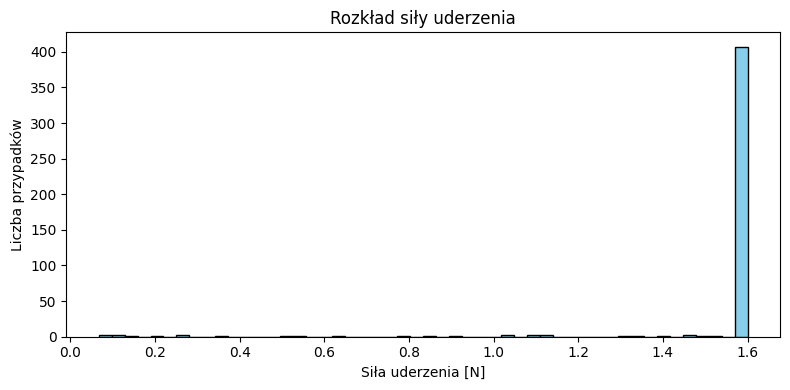

Bin edges (log): [1.         1.00944578 1.01898078 1.02860585 1.03832184 1.0481296
 1.05803    1.06802392 1.07811223 1.08829585 1.09857565 1.10895255
 1.11942747 1.13000134 1.14067508 1.15144965 1.16232599 1.17330506
 1.18438785 1.19557531 1.20686845 1.21826827 1.22977576 1.24139195
 1.25311787 1.26495454 1.27690303 1.28896437 1.30113965 1.31342992
 1.32583629 1.33835985 1.35100171 1.36376297 1.37664478 1.38964826
 1.40277457 1.41602487 1.42940033 1.44290213 1.45653147 1.47028954
 1.48417757 1.49819679 1.51234843 1.52663374 1.54105398 1.55561044
 1.57030439 1.58513714 1.60011   ]
Histogram (zliczenia): [  0   0   0   1   1   0   0   0   0   2   0   0   1   1   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   0   1   0
   0   0   0   1   1   0   1   0   0   1   0   0   0 407]
Prawdopodobieństwa histogramu: [0.         0.         0.         0.00238095 0.00238095 0.
 0.         0.         0.         0.0047619  0.         0.
 0.00238095 0.00238095 0.         0. 

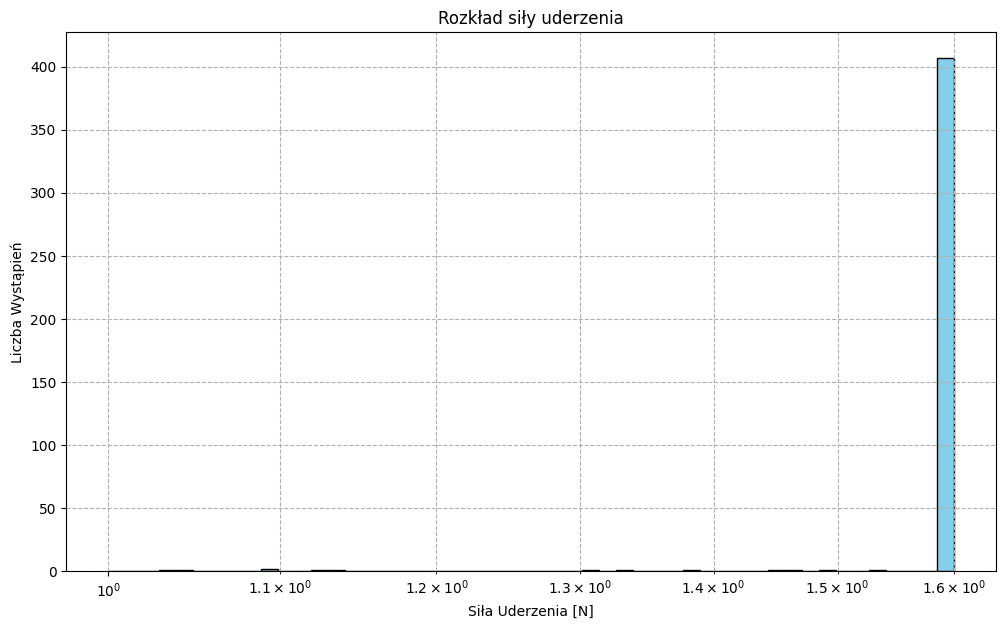

In [27]:
impact_magnitudes = []
not_zero_impacts = 0
for race in data:
    race = np.array(race)
    # Zakładam, że mLastImpactMagnitude to jedna z ostatnich 24 cech, np. indeks 1
    impact_magnitudes.extend(race[:, 13])  # -23 jeśli to druga cecha z końca, popraw jeśli inny indeks


for magnitude in impact_magnitudes:
    if magnitude > 0:
        not_zero_impacts += 1


prob_imp = not_zero_impacts / len(impact_magnitudes)
print("Prawdopodobieństwo wystąpienia uderzenia:", prob_imp)

impact_magnitudes = np.array(impact_magnitudes)




# Zbierz wszystkie wartości siły uderzenia
impact_magnitudes = []
for race in data:
    race = np.array(race)
    impact_magnitudes.extend(race[:, 13])  # -26 jeśli to druga cecha z końca

impact_magnitudes = np.array(impact_magnitudes)

impact_magnitudes = impact_magnitudes[impact_magnitudes > 0]  # tylko wartości większe niż 0

# Policz histogram (np. 20 przedziałów)
# hist, bin_edges = np.histogram(impact_magnitudes, bins=90, density=True)
# print("Bin edges:", bin_edges)
# probabilities = hist / hist.sum()  # prawdopodobieństwa dla każdego przedziału
# print(probabilities)
print(max(impact_magnitudes))
plt.figure(figsize=(8, 4))
plt.hist(impact_magnitudes, bins=50, color='skyblue', edgecolor='black')
plt.title("Rozkład siły uderzenia")
plt.xlabel("Siła uderzenia [N]")
plt.ylabel("Liczba przypadków")
plt.tight_layout()
plt.show()

min_val = np.min(impact_magnitudes)
max_val = np.max(impact_magnitudes) # np. 22000

# Użyj np. 1.0 jako absolutnego minimum, jeśli min_val jest bardzo małe
min_exp = np.log10(max(1.0, min_val)) 
max_exp = np.log10(max_val)

# num=51 da 50 binów
log_bin_edges = np.logspace(min_exp, max_exp, num=51)

# 3. Stwórz histogram (zliczający) używając tych binów
hist, bin_edges = np.histogram(impact_magnitudes, bins=log_bin_edges, density=False)

# 4. Przekształć zliczenia na prawdopodobieństwa
# To jest PMF dla uderzeń > 0
probabilities_hist = hist / hist.sum()

print("Bin edges (log):", bin_edges)
print("Histogram (zliczenia):", hist)
print("Prawdopodobieństwa histogramu:", probabilities_hist)

# Oblicz szerokość każdego słupka (w skali logarytmicznej!)
# Musimy użyć 'bin_edges'
bar_widths = bin_edges[1:] - bin_edges[:-1]

# Oblicz środek każdego słupka (dla etykiet osi X)
bar_centers = bin_edges[:-1] + bar_widths / 2.0

# --- Krok 2: Narysuj wykres ---
plt.figure(figsize=(12, 7))

# Stwórz wykres słupkowy
# 'hist' to wysokość (zliczenia)
# 'bin_edges' to pozycje na osi X
# 'width' to szerokość każdego słupka
plt.bar(bin_edges[:-1], hist, width=bar_widths, align='edge', edgecolor='black', color='skyblue')

# --- Krok 3: Ustaw oś X na logarytmiczną (KLUCZOWE!) ---
# To sprawi, że słupki będą wyglądały na równe wizualnie
plt.xscale('log')

# --- Krok 4: Dodaj etykiety i pokaż ---
plt.xlabel('Siła Uderzenia [N]')
plt.ylabel('Liczba Wystąpień')
plt.title('Rozkład siły uderzenia')
plt.grid(True, which="both", ls="--") # Pokaż siatkę

# Pokaż wykres
plt.show()

# # 5. Zapisz wyniki
# np.save('probabilities.npy', probabilities_hist)
# np.save('bin_edges.npy', bin_edges)

np.save('E:/pracadyp/Race-optimization-reinforcement-learning/data/probabilities_impact/probabilities.npy', probabilities_hist)
np.save('E:/pracadyp/Race-optimization-reinforcement-learning/data/probabilities_impact/bin_edges.npy', bin_edges)


Map damages to impact magnitude

In [28]:
import numpy as np
import pandas as pd

# --- 1. Inicjalizacja list (POZA pętlą 'for race...') ---
all_impacts_t = []
all_dents_before_flat = [] # Stan w t-1
all_dents_after_flat = []  # Stan w t

print("Rozpoczynam zbieranie danych przejściowych (logika t-1 -> t)...")

for race in data:
    race = np.array(race)
    
    if len(race) < 2:
        continue # Pomiń wyścigi krótsze niż 2 kroki

    # 1. Stwórz "przesunięte" tablice, aby uzyskać pary (t-1) -> (t)
    
    # Stan wgnieceń w kroku 't-1' (ignorujemy ostatni krok)
    dents_t_minus_1 = race[:-1, 20:28] # Kolumny 20-27
    
    # Stan wgnieceń w kroku 't' (ignorujemy pierwszy krok)
    dents_t = race[1:, 20:28] 

    # Siła uderzenia w kroku 't' (ignorujemy pierwszy krok)
    impacts_t = race[1:, 13]
    
    # 2. Spłaszcz 8 elementów wgnieceń
    dents_t_minus_1_flat = dents_t_minus_1.flatten()
    dents_t_flat = dents_t.flatten()
    
    # 3. Powtórz impakty 8 razy, aby pasowały
    impacts_t_flat = np.repeat(impacts_t, 8)
    
    # 4. Rozszerz główne listy
    all_impacts_t.extend(impacts_t_flat)
    all_dents_before_flat.extend(dents_t_minus_1_flat)
    all_dents_after_flat.extend(dents_t_flat)

# --- 2. Konwersja na tablice NumPy ---
all_impacts_t = np.array(all_impacts_t)
all_dents_before_flat = np.array(all_dents_before_flat)
all_dents_after_flat = np.array(all_dents_after_flat)

print(f"Zebrano łącznie {len(all_impacts_t)} próbek przejściowych.")

import pandas as pd # Import pandas dla ładnego wyświetlania tabeli

# --- 3. Filtrowanie danych (Twoje reguły) ---
mask_impact_happened = all_impacts_t > 0
mask_can_be_damaged = all_dents_before_flat < 2.0 # Użyj stanu 'before' (t-1)
valid_mask = mask_impact_happened & mask_can_be_damaged

impacts_to_analyze = all_impacts_t[valid_mask]
dents_before_to_analyze = all_dents_before_flat[valid_mask]
dents_after_to_analyze = all_dents_after_flat[valid_mask]

# --- 4. Oblicz "Deltę" (o ile zmienił się stan) ---
delta_dents = dents_after_to_analyze - dents_before_to_analyze

print(f"Znaleziono {len(impacts_to_analyze)} ważnych próbek uszkodzeń.")

# --- 5. Stwórz Biny (Progi) ---
if len(impacts_to_analyze) > 0:
    min_val_safe = max(1.0, np.min(impacts_to_analyze))
    min_exp = np.log10(min_val_safe)
    max_exp = np.log10(np.max(impacts_to_analyze))
    num_bins = 20
    bin_edges = np.logspace(min_exp, max_exp, num=num_bins + 1)
    
    bin_indices = np.digitize(impacts_to_analyze, bins=bin_edges)

    # --- 6. Oblicz Prawdopodobieństwa dla każdego Progu ---
    damage_map_list = []
    
    for i in range(1, num_bins + 1):
        deltas_in_this_bin = delta_dents[bin_indices == i]
        total_in_bin = len(deltas_in_this_bin)
        
        bin_range = f"[{bin_edges[i-1]:.0f} - {bin_edges[i]:.0f})"
        
        if total_in_bin == 0:
            prob_map = {'Próg Siły [N]': bin_range, 'Liczba Próbek': 0, 'P(Zmiana = 1)': 0.0, 'P(Zmiana = 2)': 0.0}
        else:
            p1 = np.sum(deltas_in_this_bin == 1) / total_in_bin
            p2 = np.sum(deltas_in_this_bin == 2) / total_in_bin
            
            prob_map = {
                'Próg Siły [N]': bin_range,
                'Liczba Próbek': total_in_bin,
                'P(Zmiana = 1)': p1,
                'P(Zmiana = 2)': p2
            }
        damage_map_list.append(prob_map)

    # --- 7. Wyświetl finalną "Mapę" ---
    df_damage_map = pd.DataFrame(damage_map_list)
    pd.set_option('display.precision', 3) 

    print("\n--- (POPRAWIONA) Mapa Prawdopodobieństwa Zmiany Wgniecenia ---")
    print(df_damage_map.to_string())
else:
    print("Nie znaleziono żadnych próbek uszkodzeń spełniających kryteria.")

Rozpoczynam zbieranie danych przejściowych (logika t-1 -> t)...
Zebrano łącznie 542280 próbek przejściowych.
Znaleziono 3219 ważnych próbek uszkodzeń.

--- (POPRAWIONA) Mapa Prawdopodobieństwa Zmiany Wgniecenia ---
   Próg Siły [N]  Liczba Próbek  P(Zmiana = 1)  P(Zmiana = 2)
0        [1 - 1)              0      0.000e+00            0.0
1        [1 - 1)             14      0.000e+00            0.0
2        [1 - 1)              0      0.000e+00            0.0
3        [1 - 1)             13      0.000e+00            0.0
4        [1 - 1)              6      0.000e+00            0.0
5        [1 - 1)              8      0.000e+00            0.0
6        [1 - 1)              0      0.000e+00            0.0
7        [1 - 1)              0      0.000e+00            0.0
8        [1 - 1)              0      0.000e+00            0.0
9        [1 - 1)              0      0.000e+00            0.0
10       [1 - 1)              0      0.000e+00            0.0
11       [1 - 1)              8      0.00

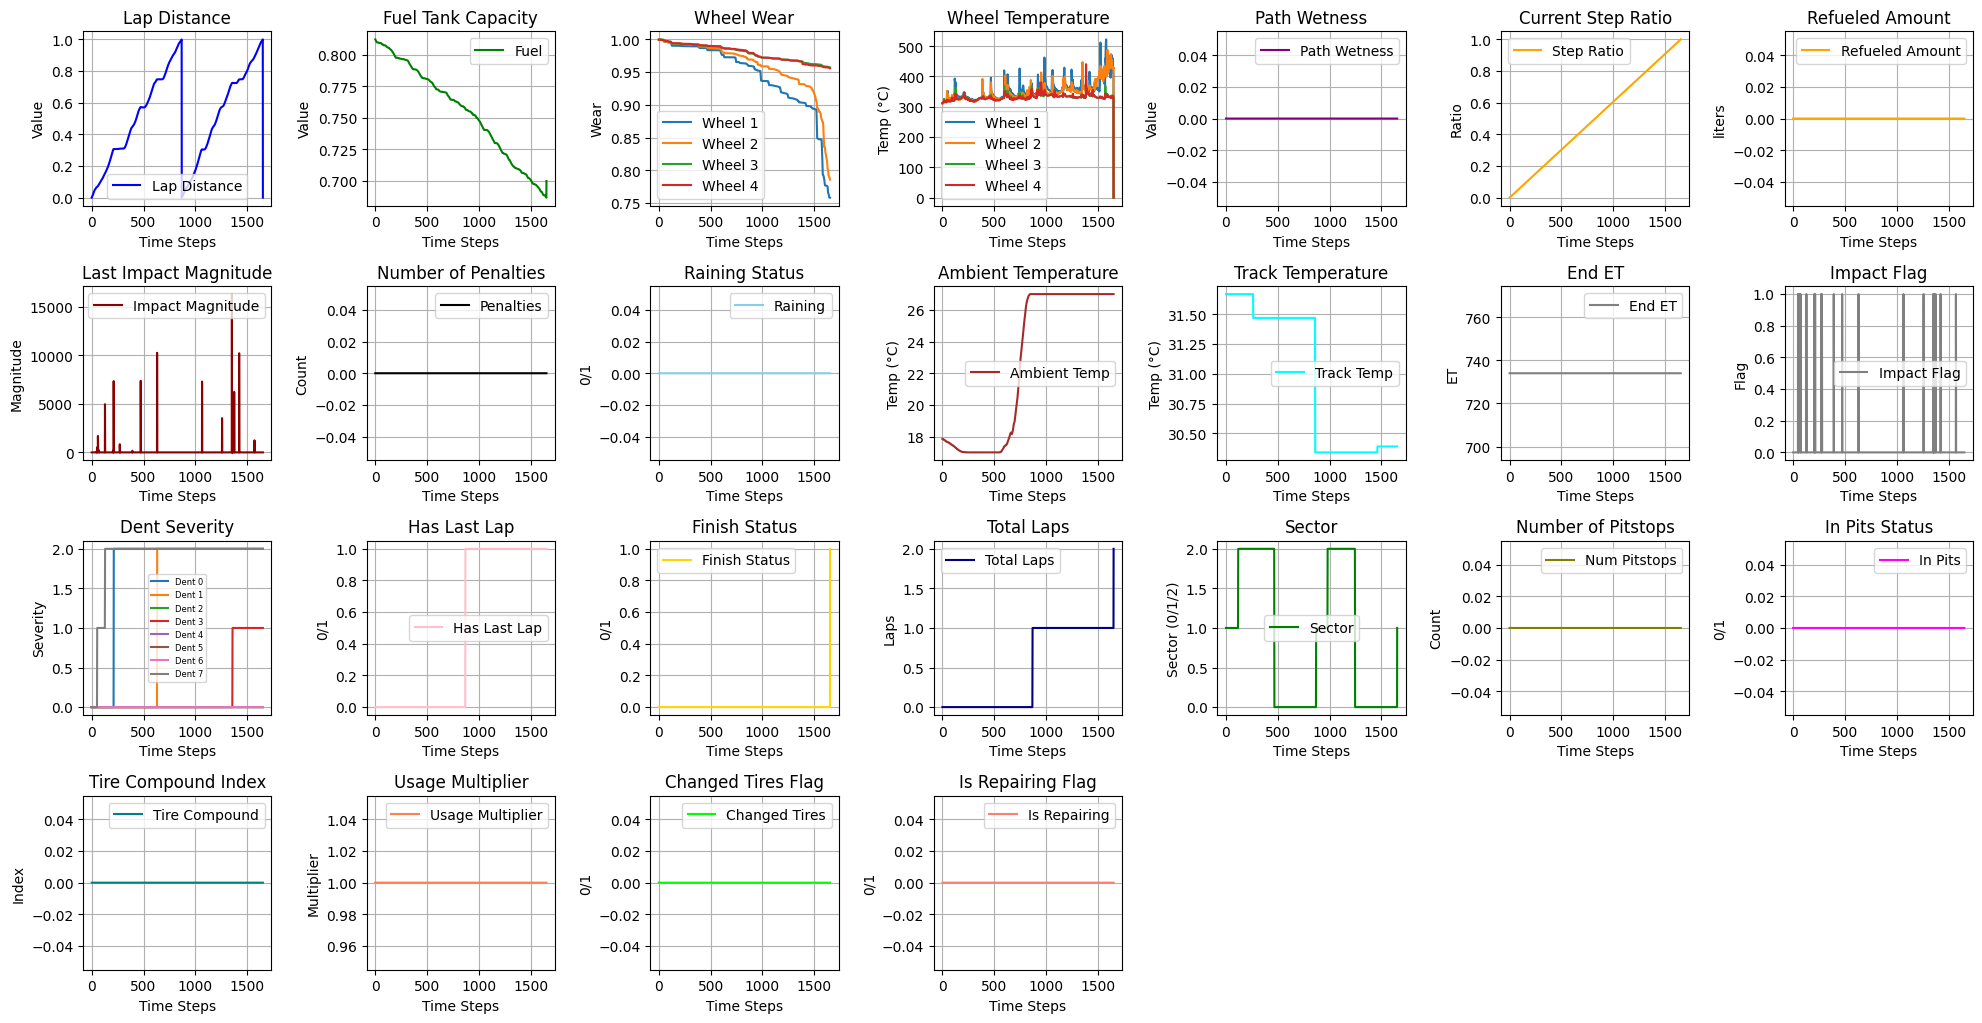

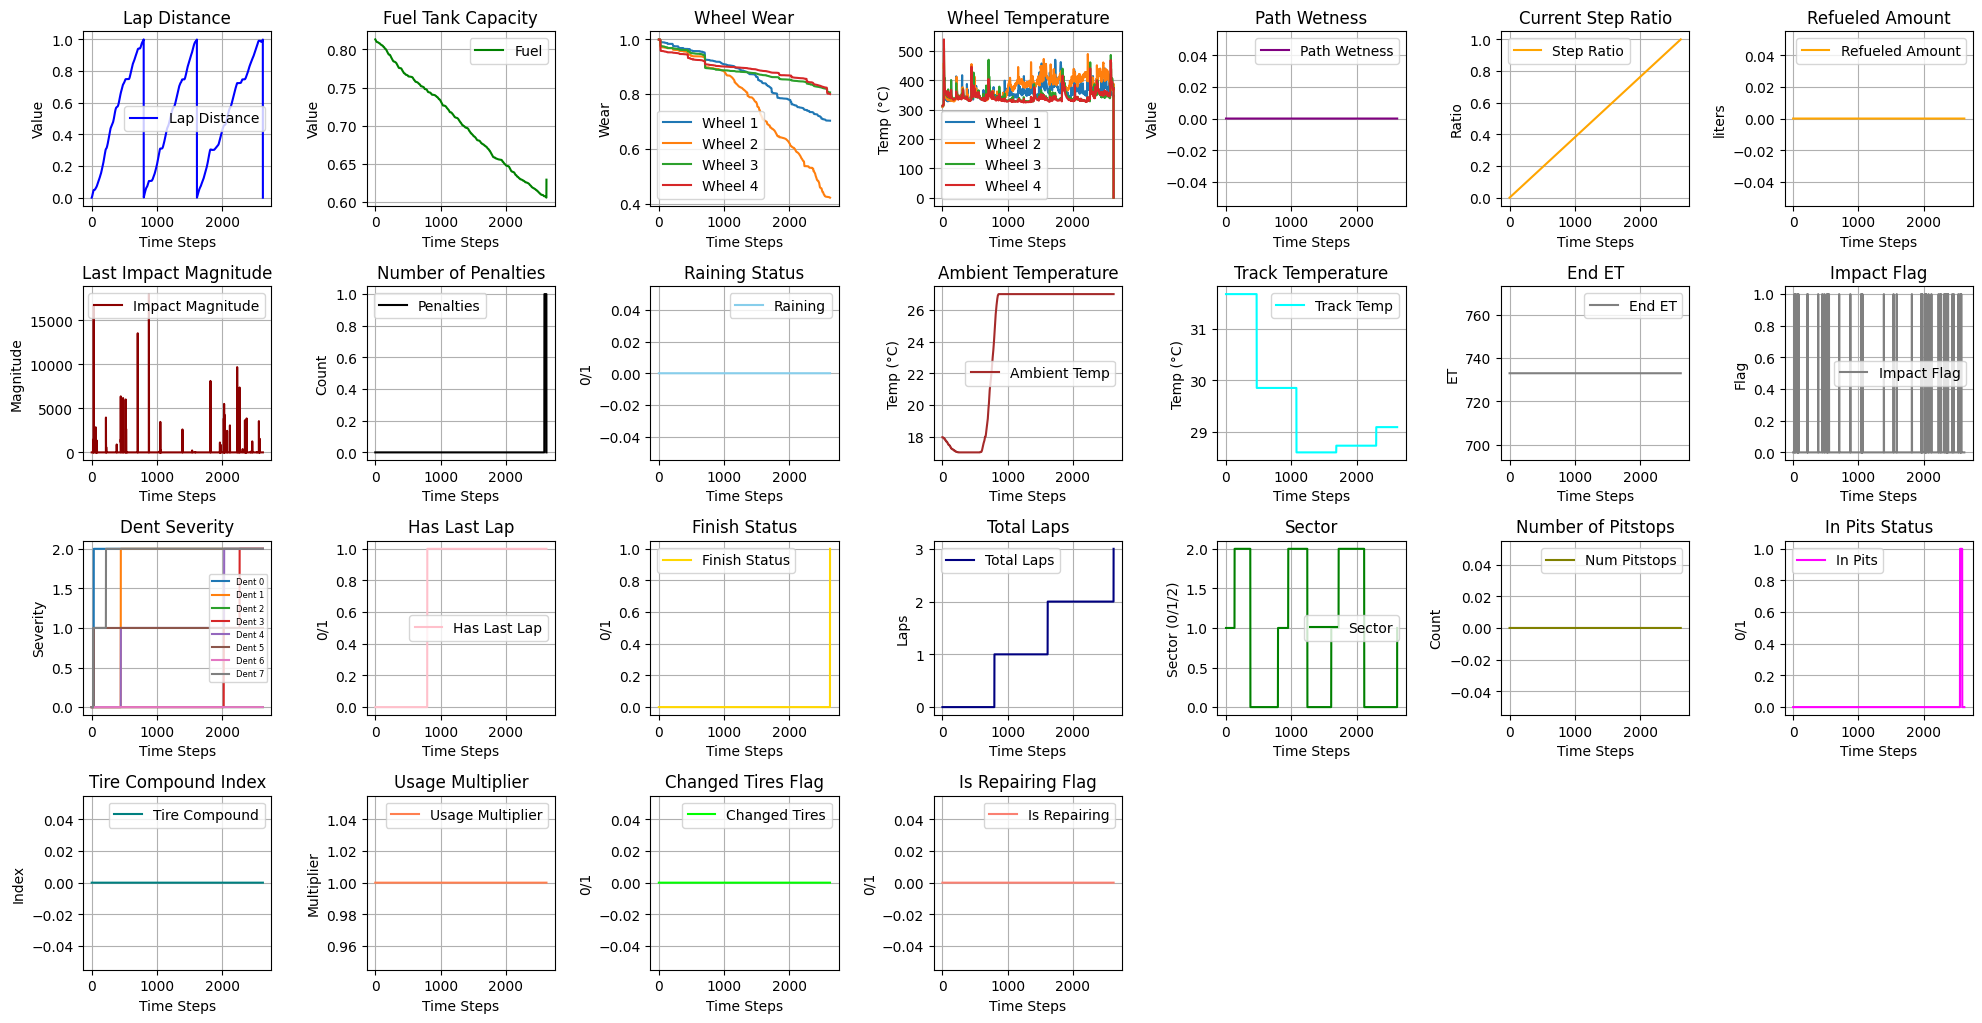

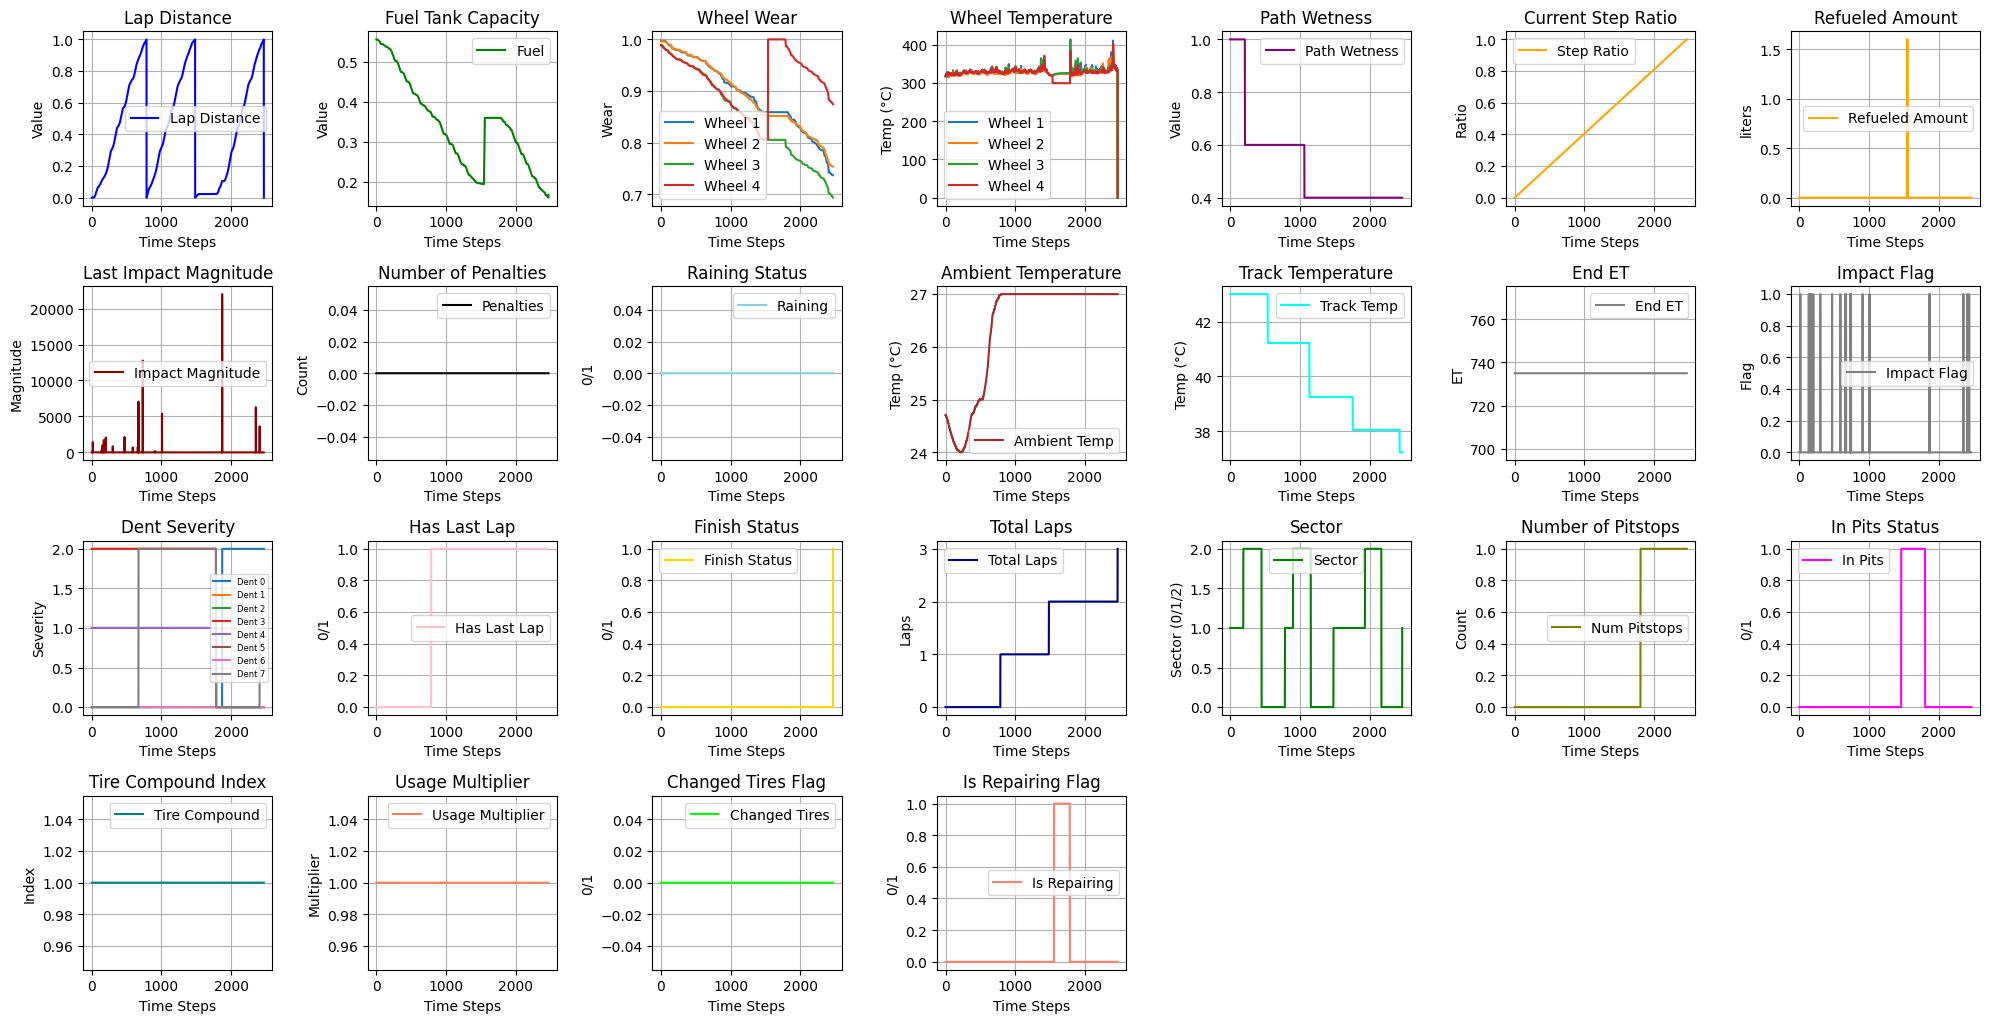

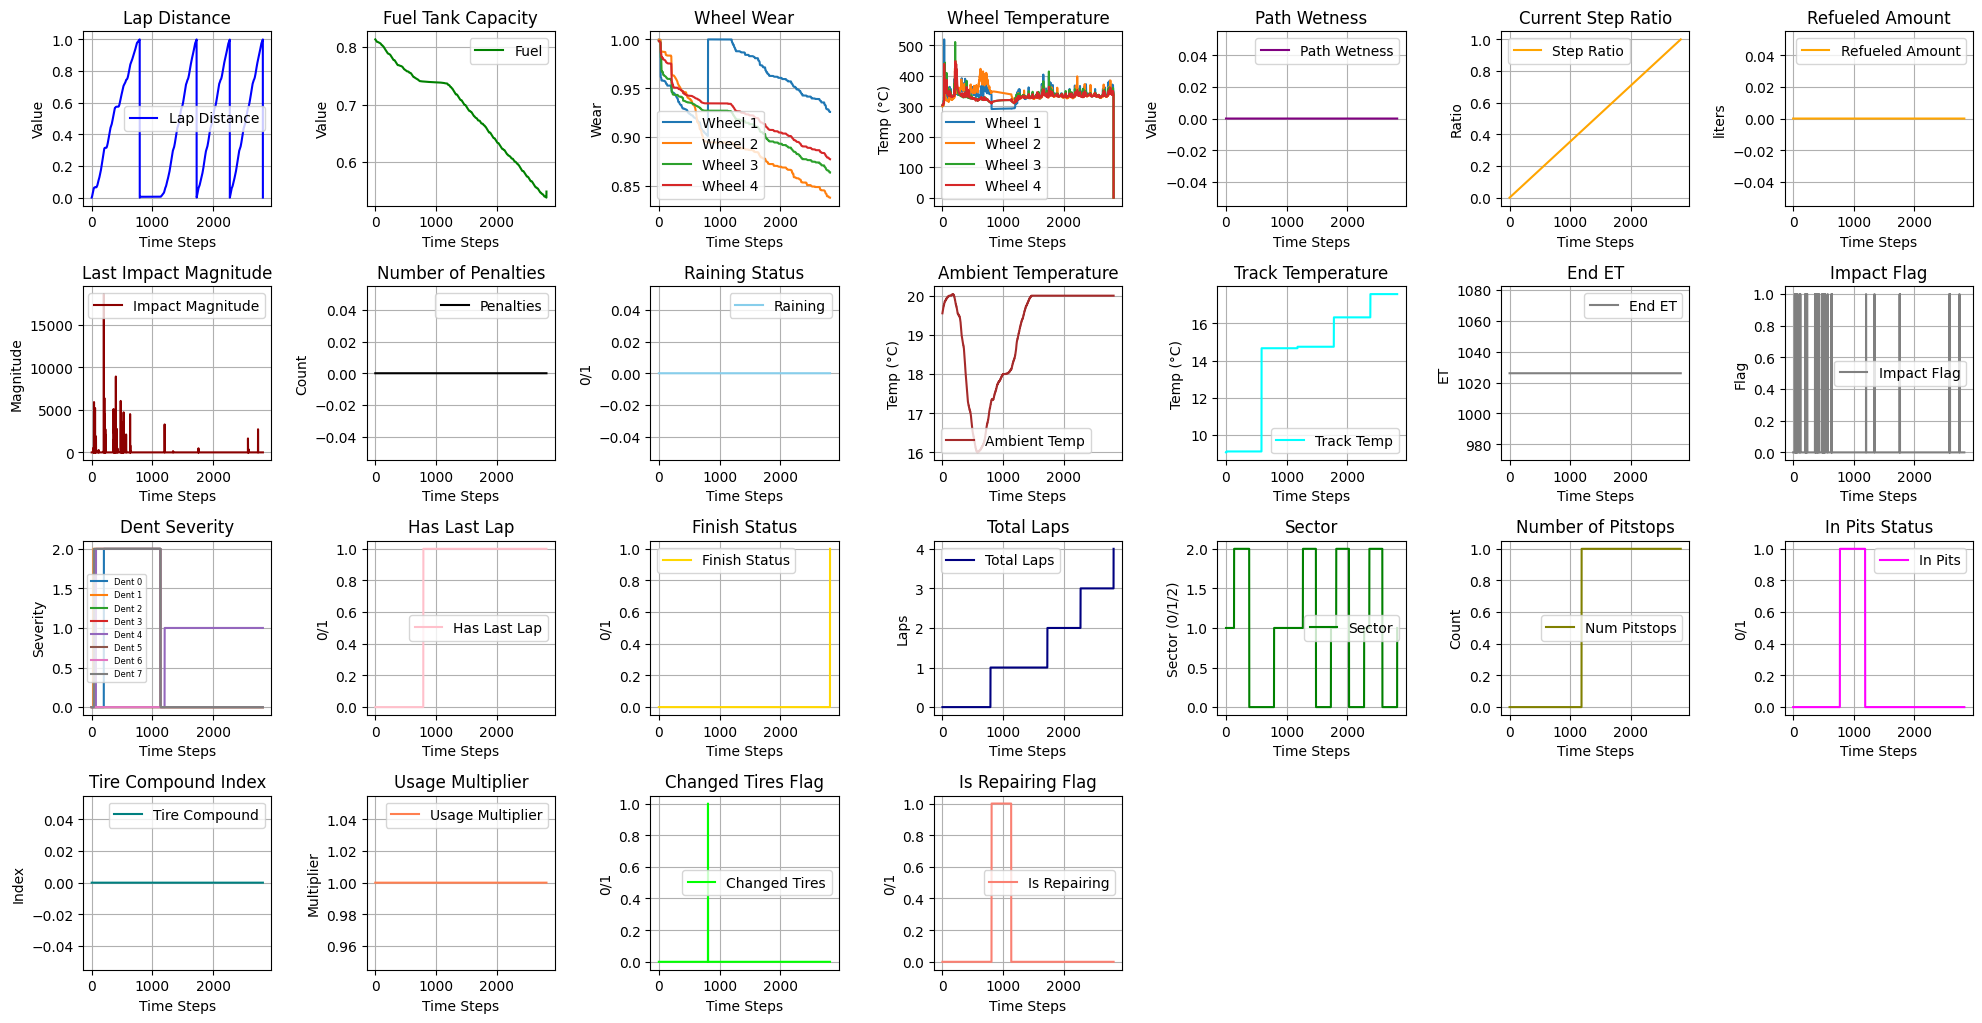

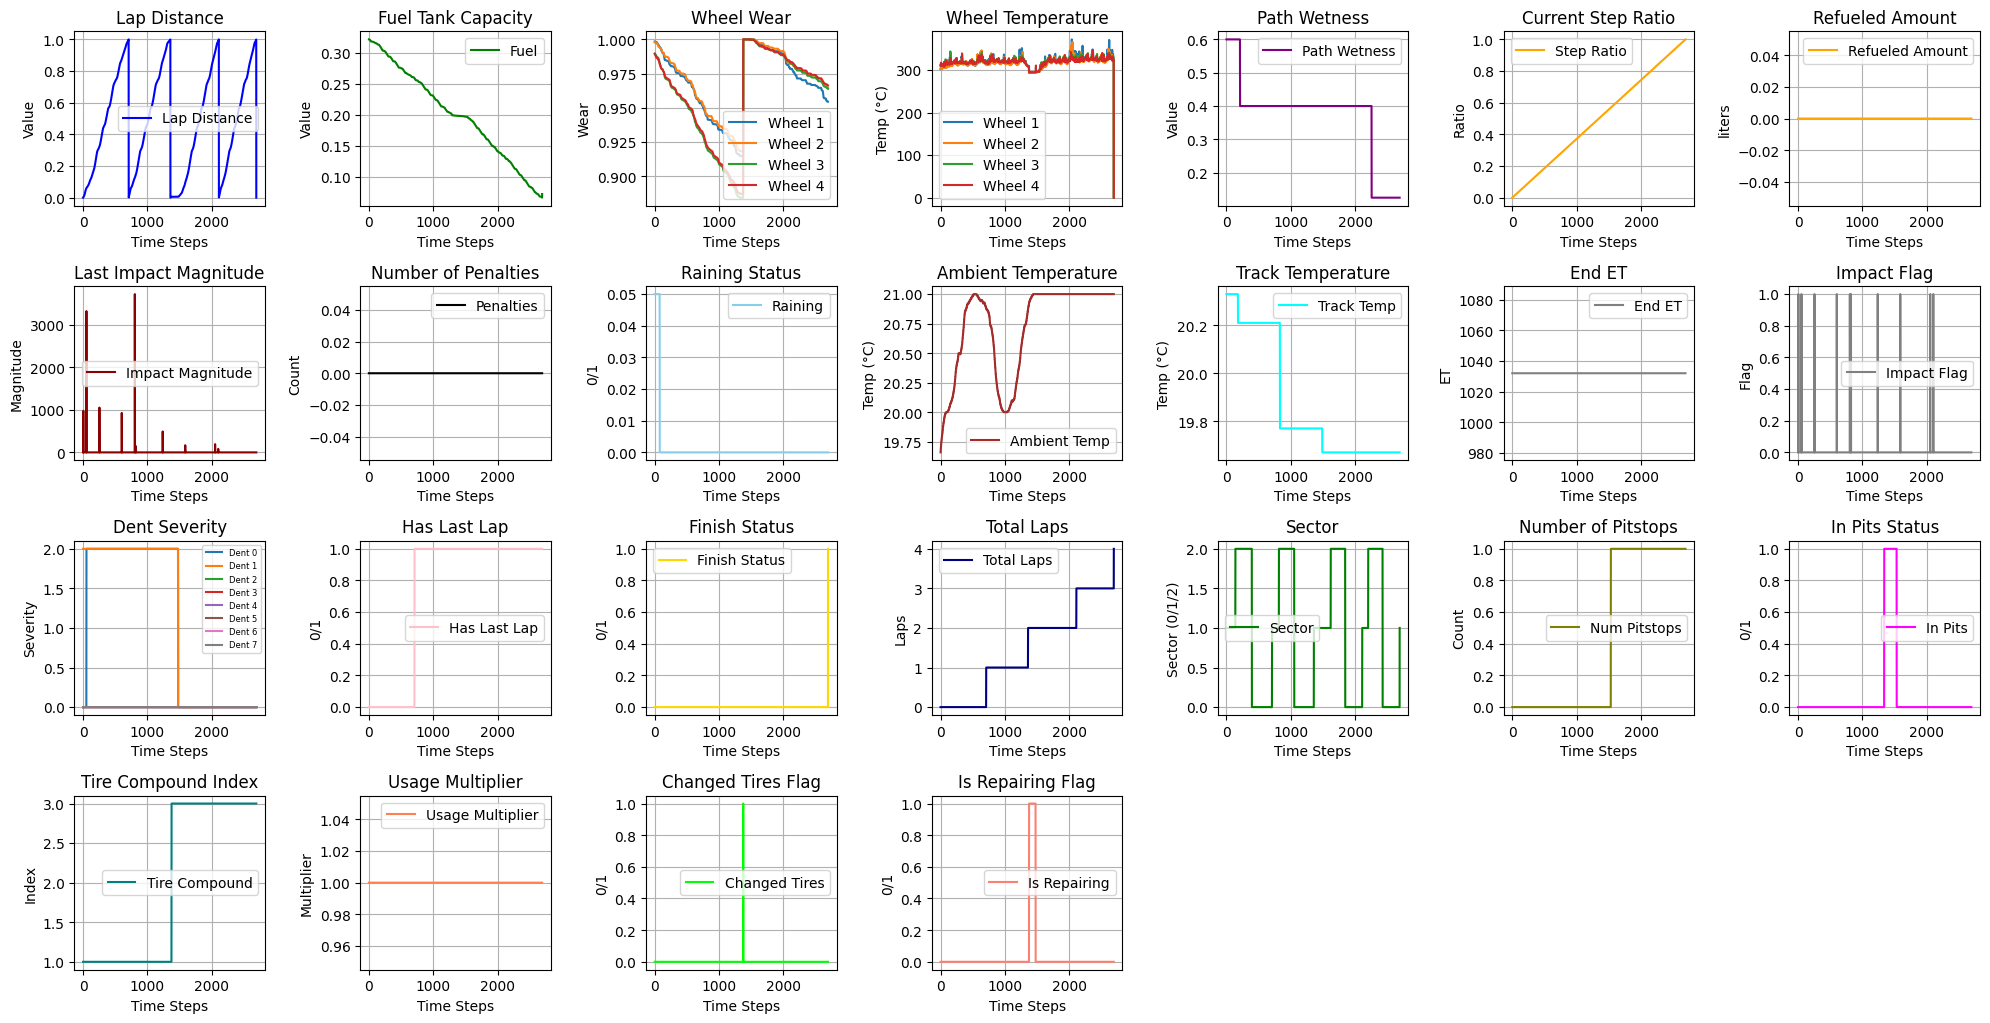

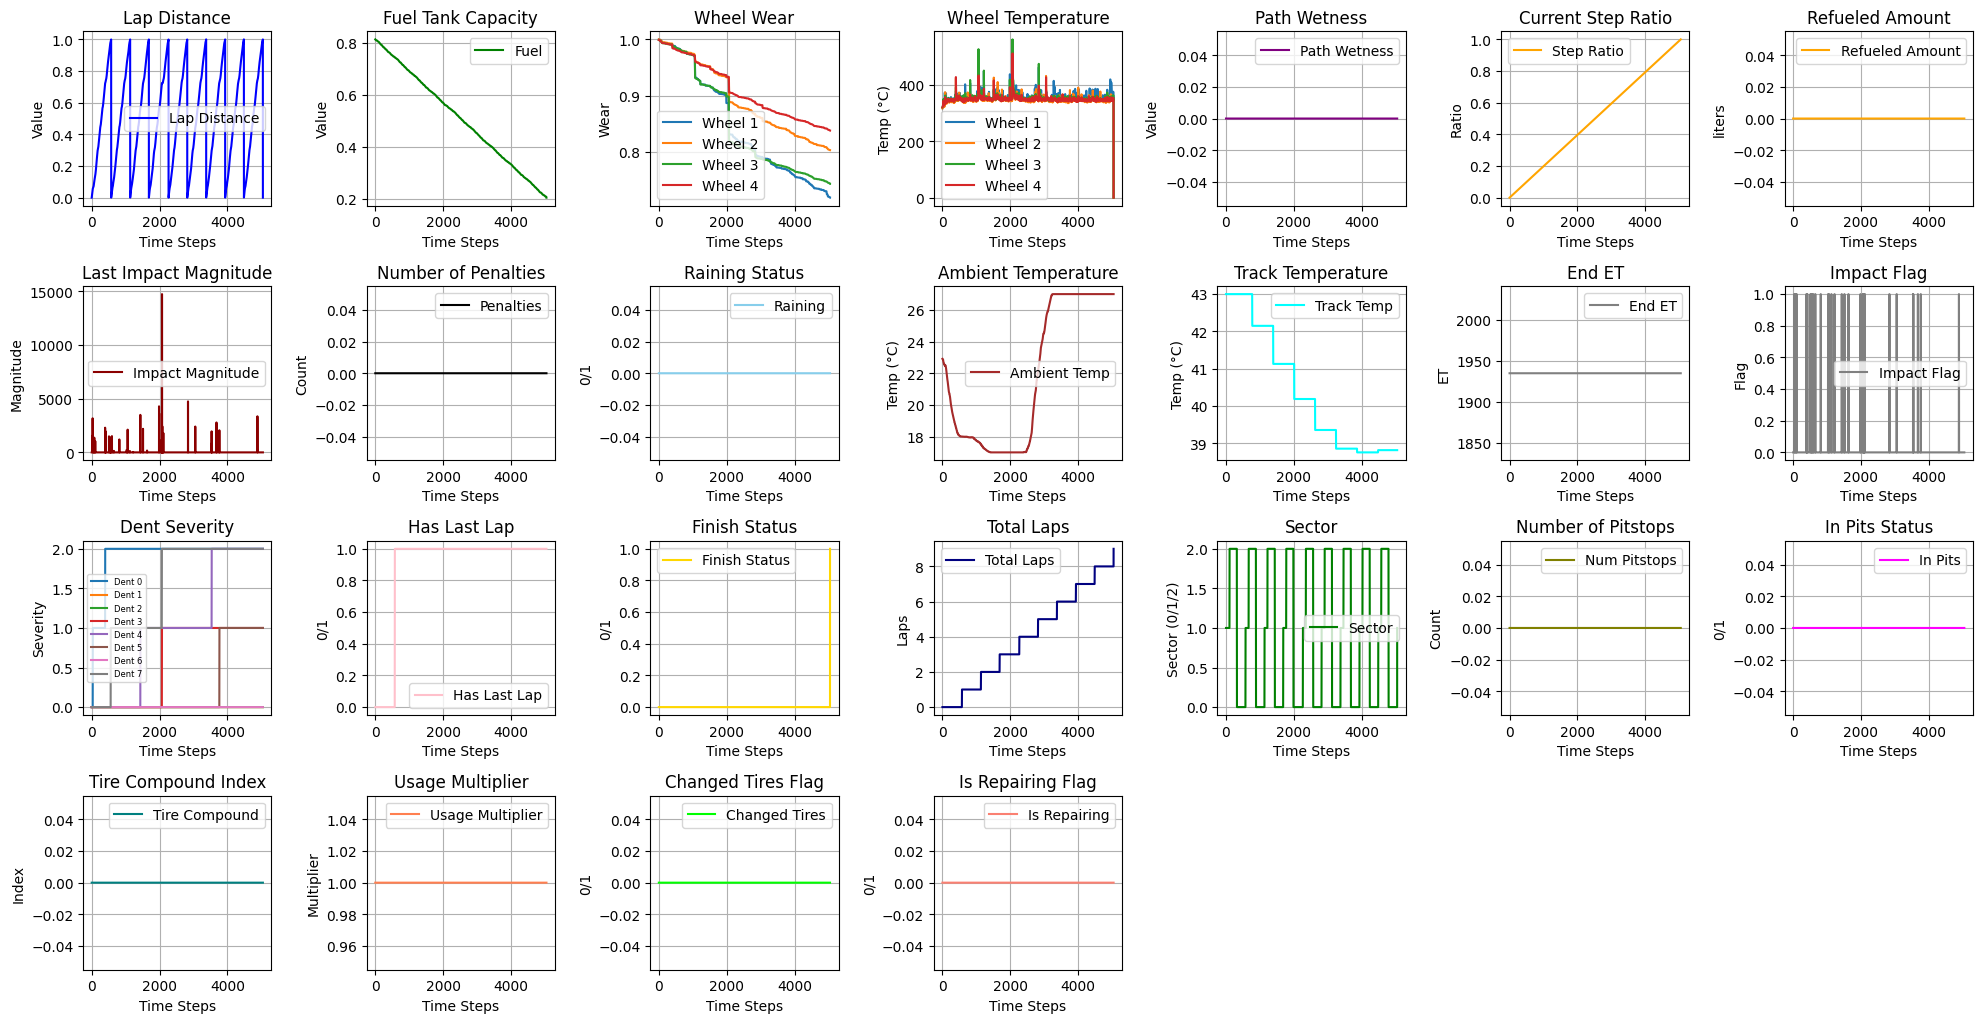

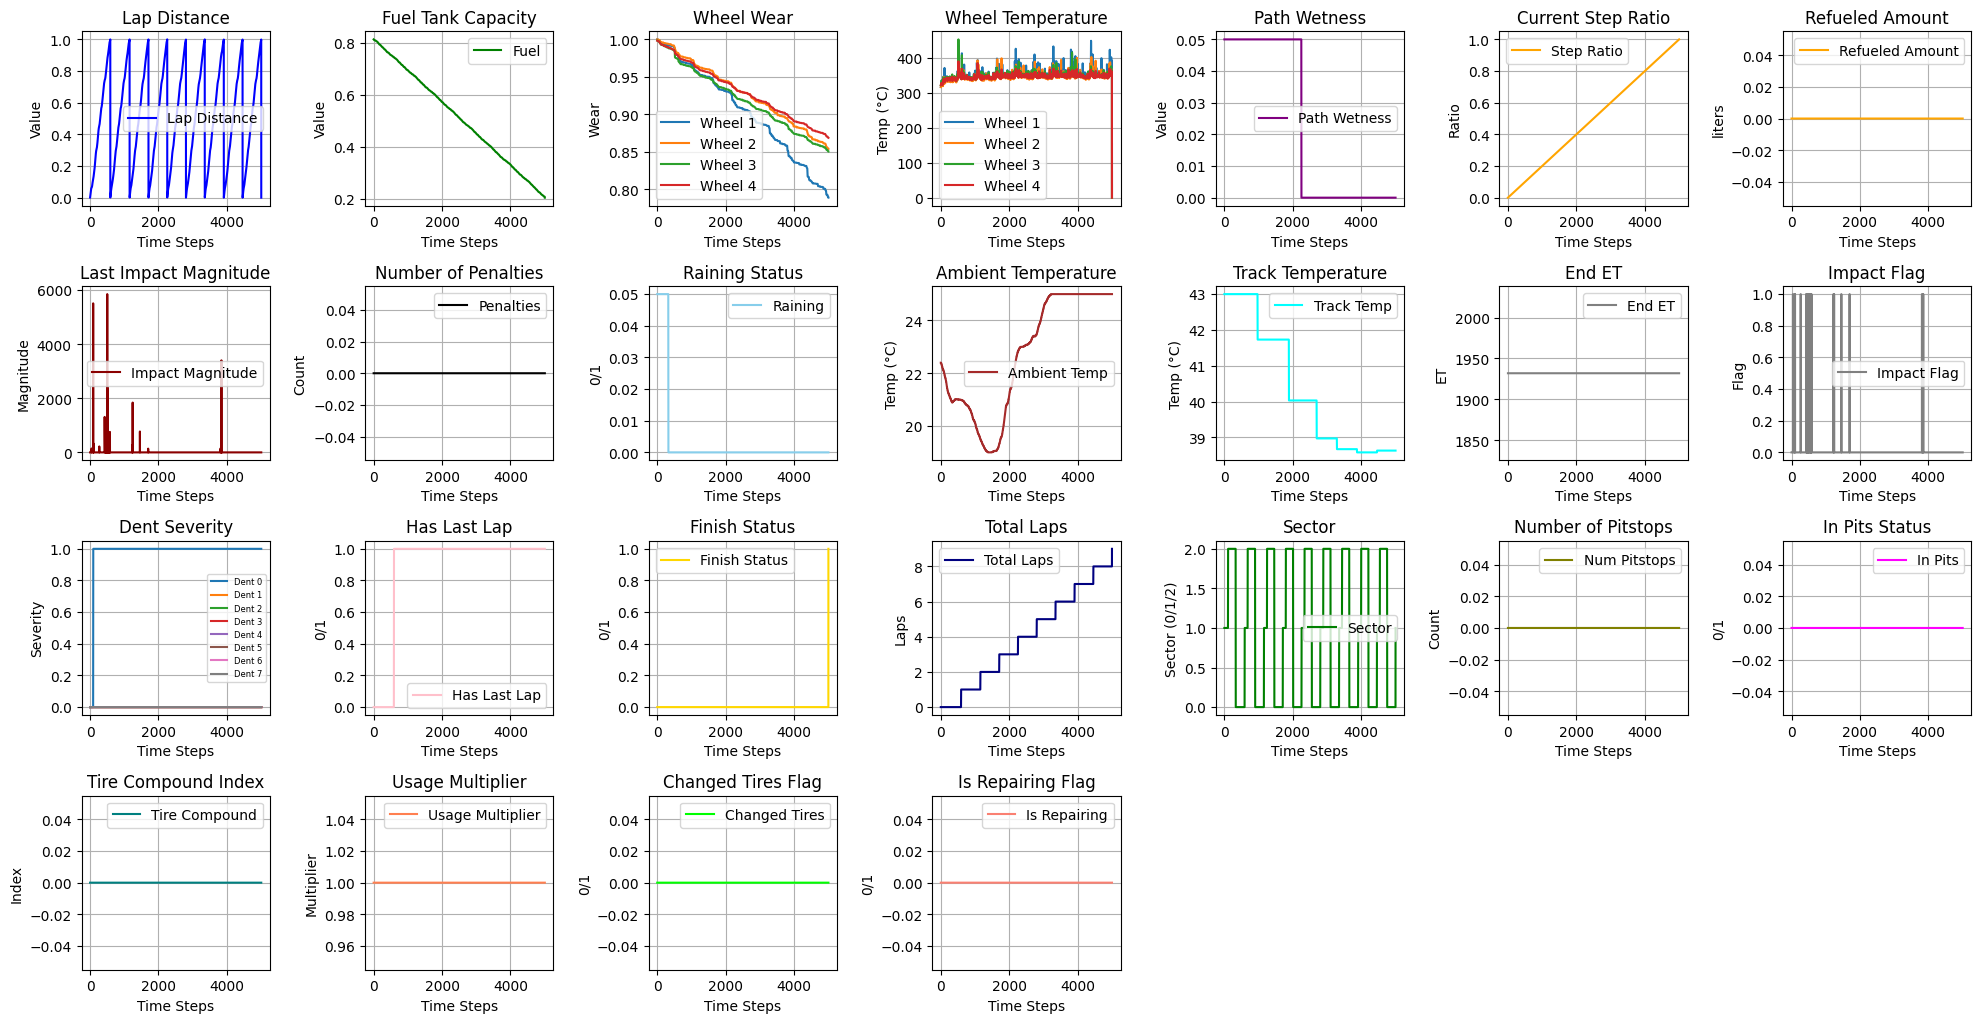

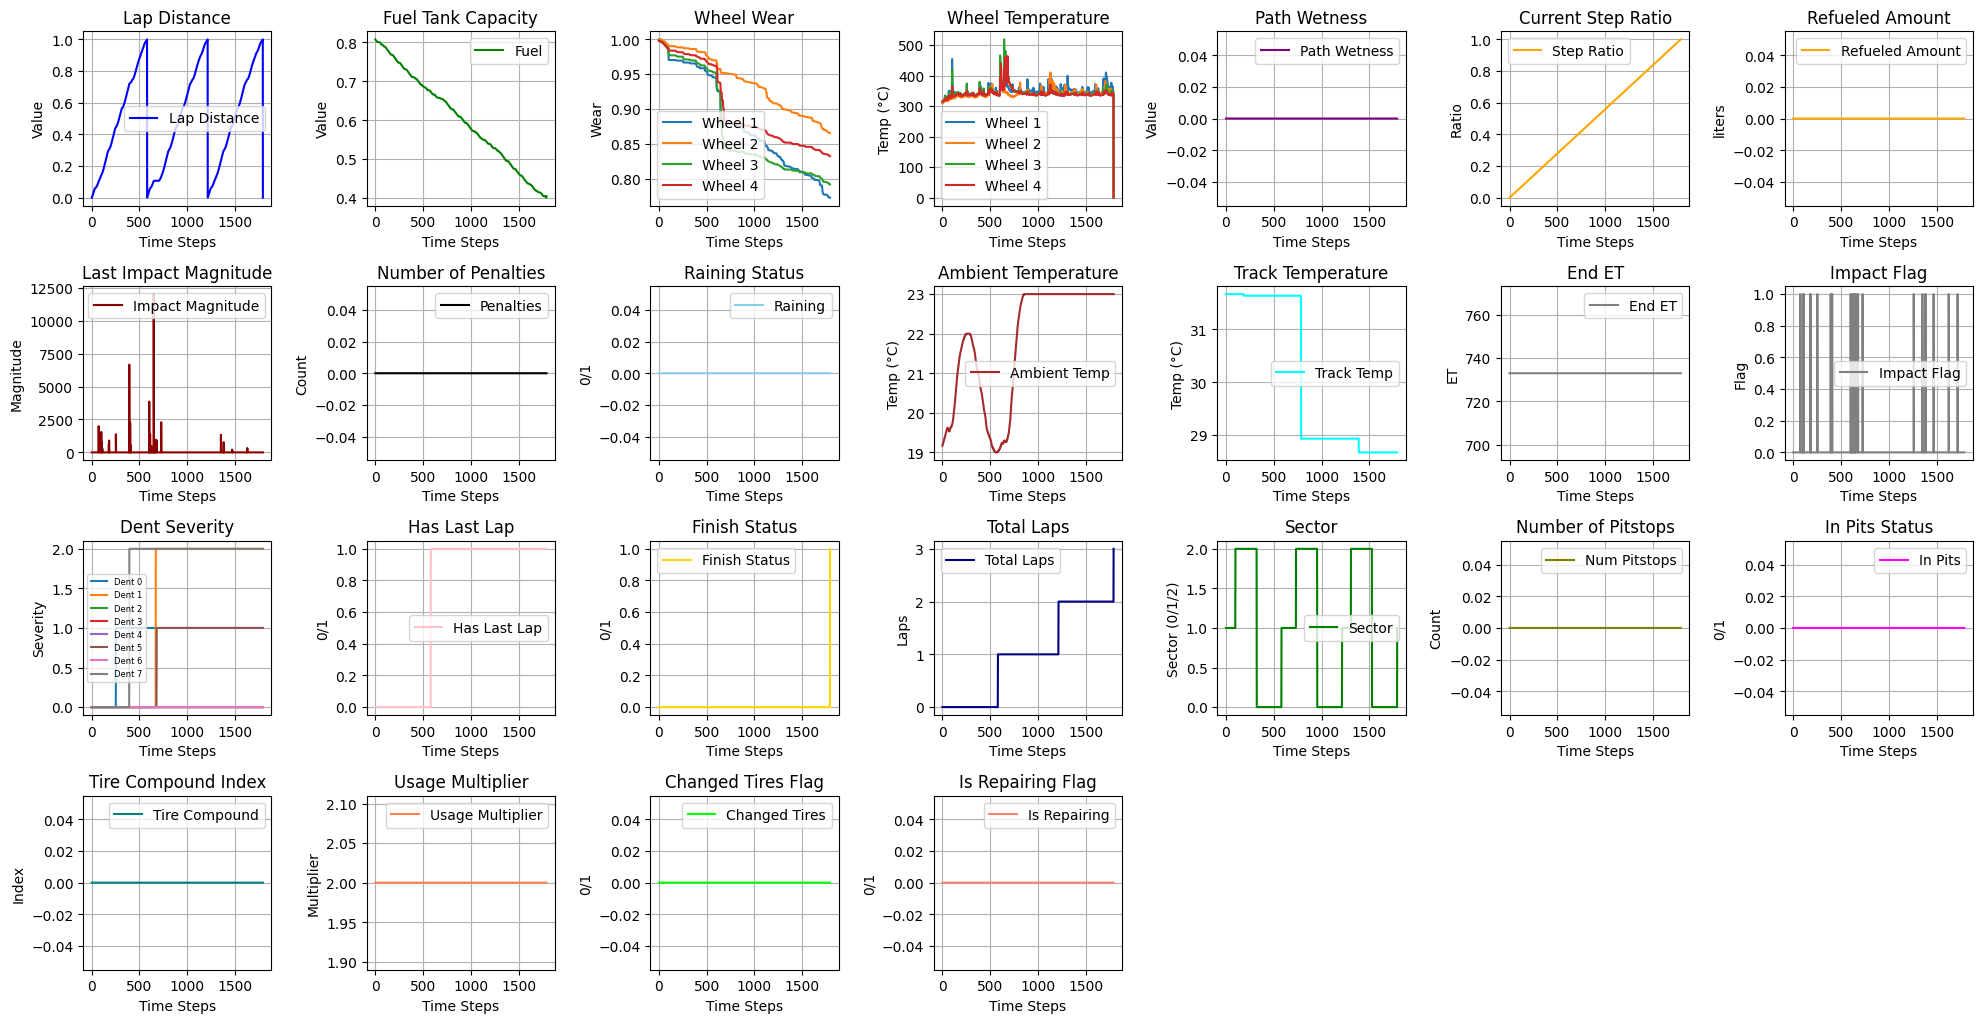

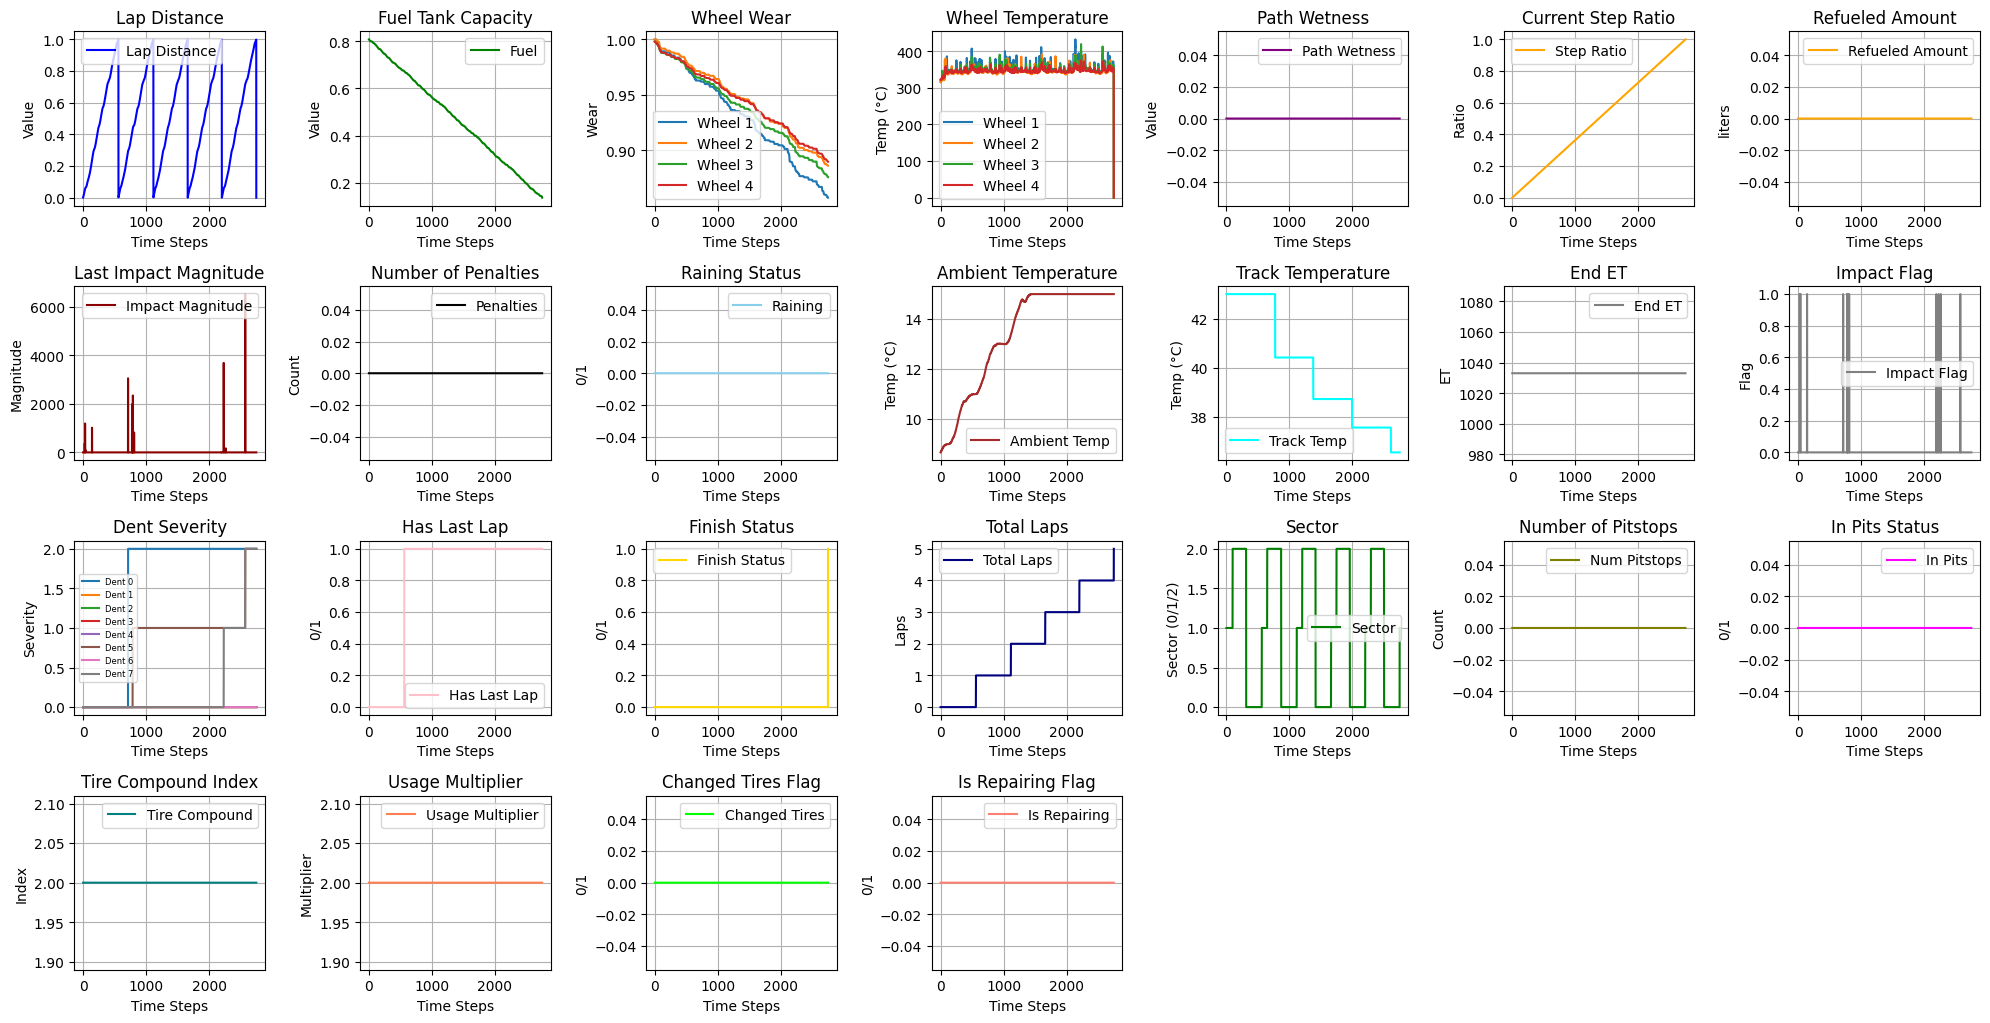

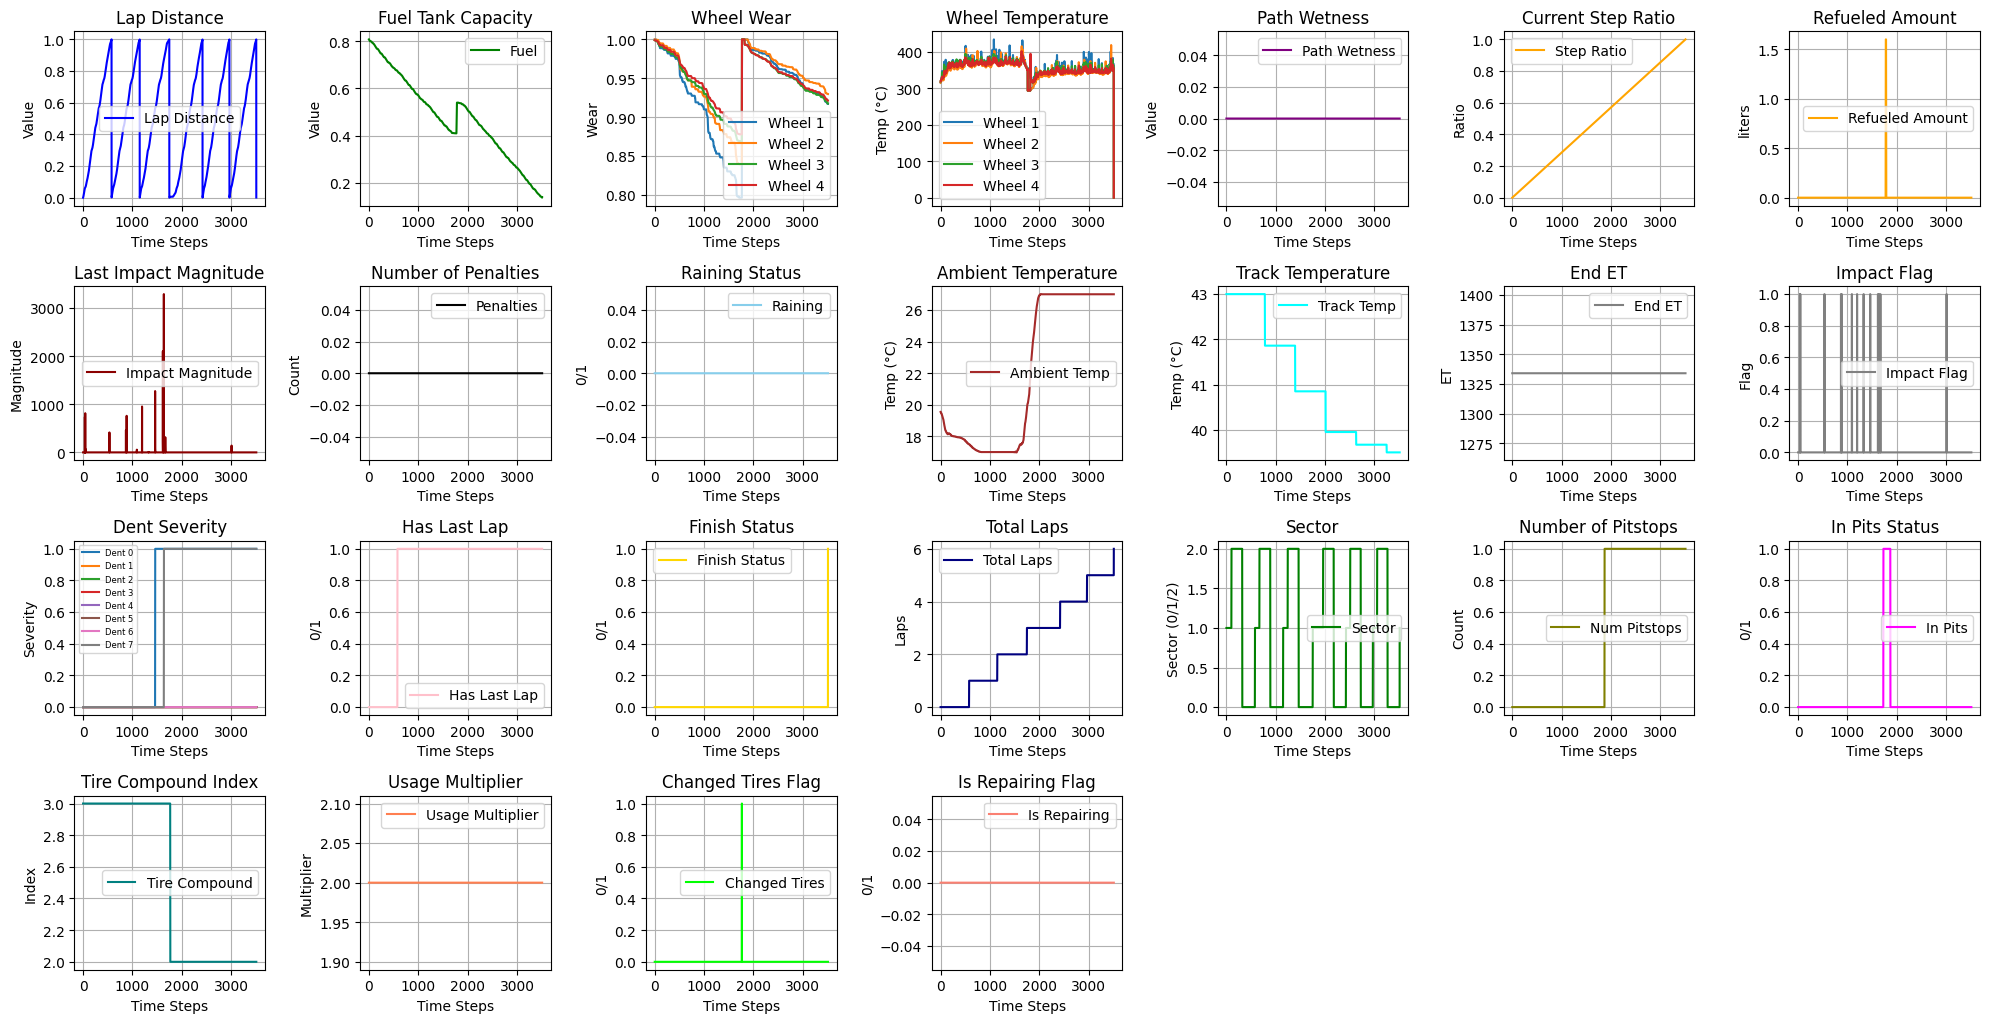

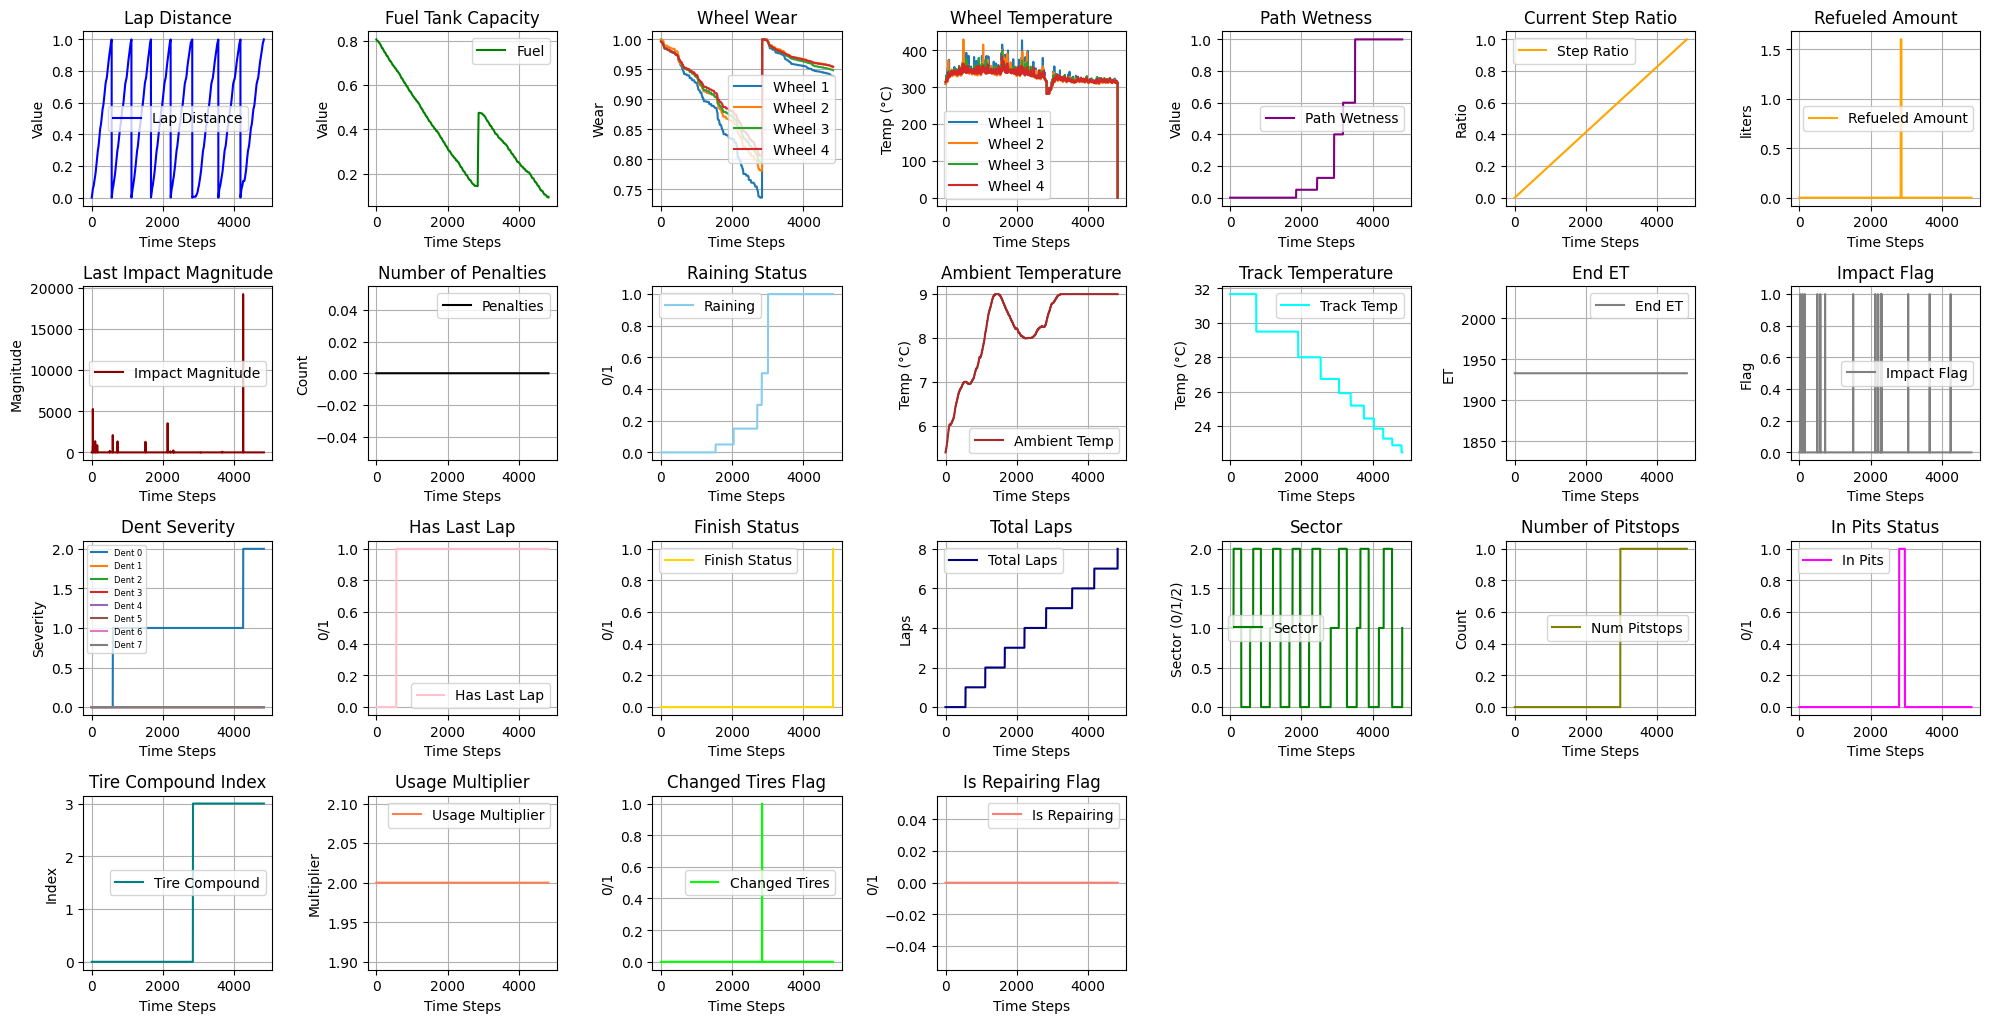

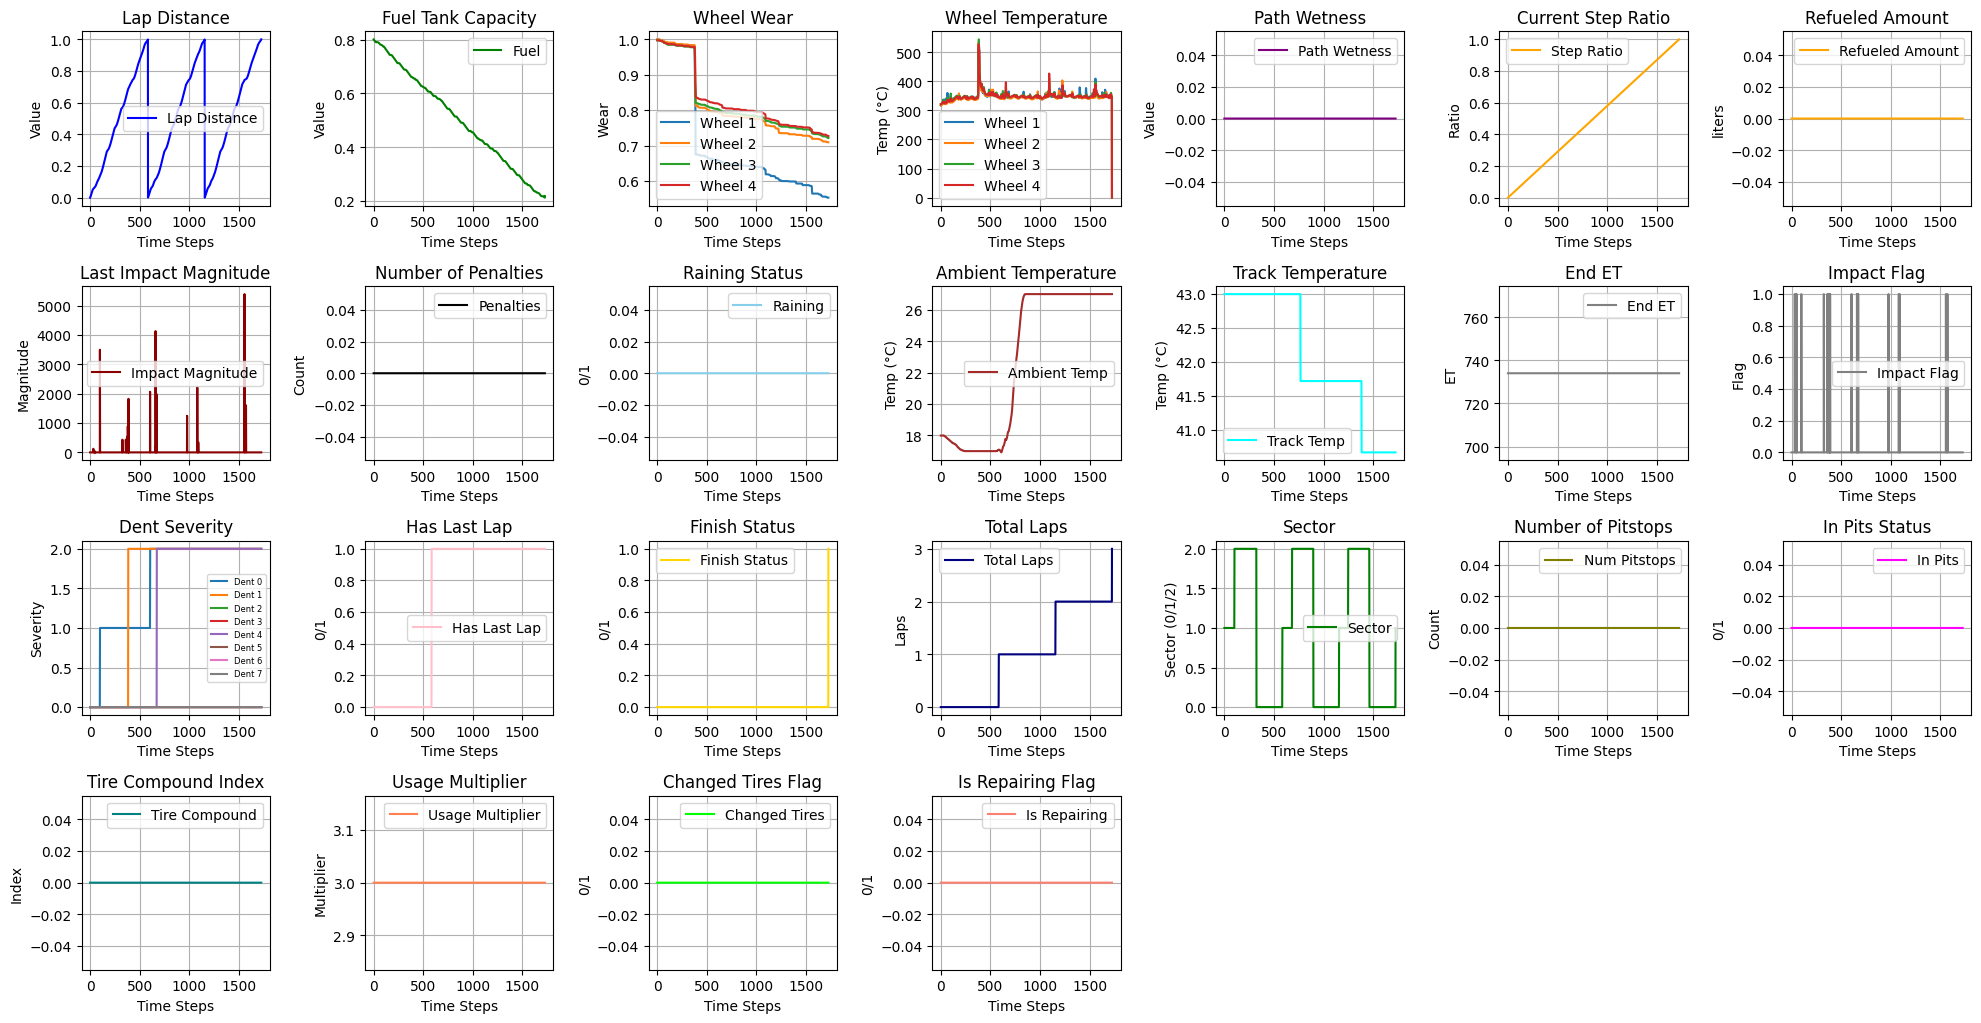

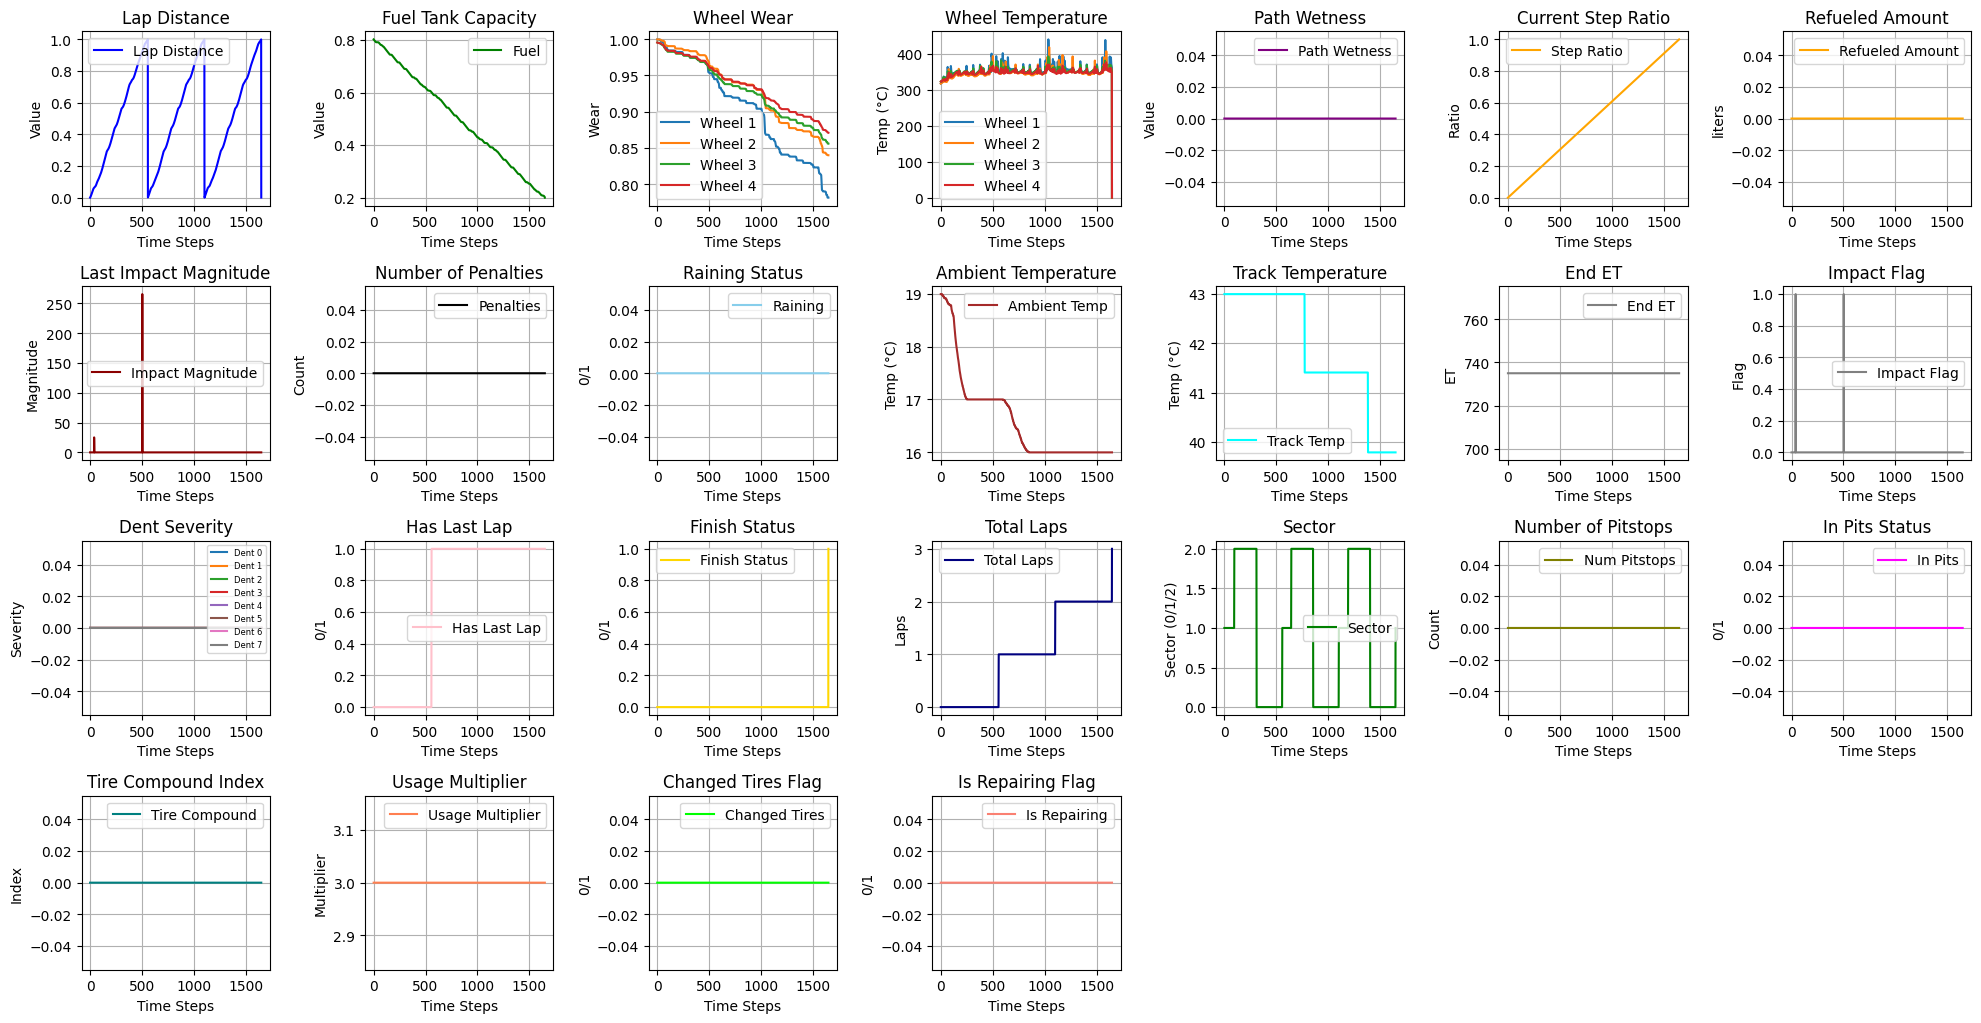

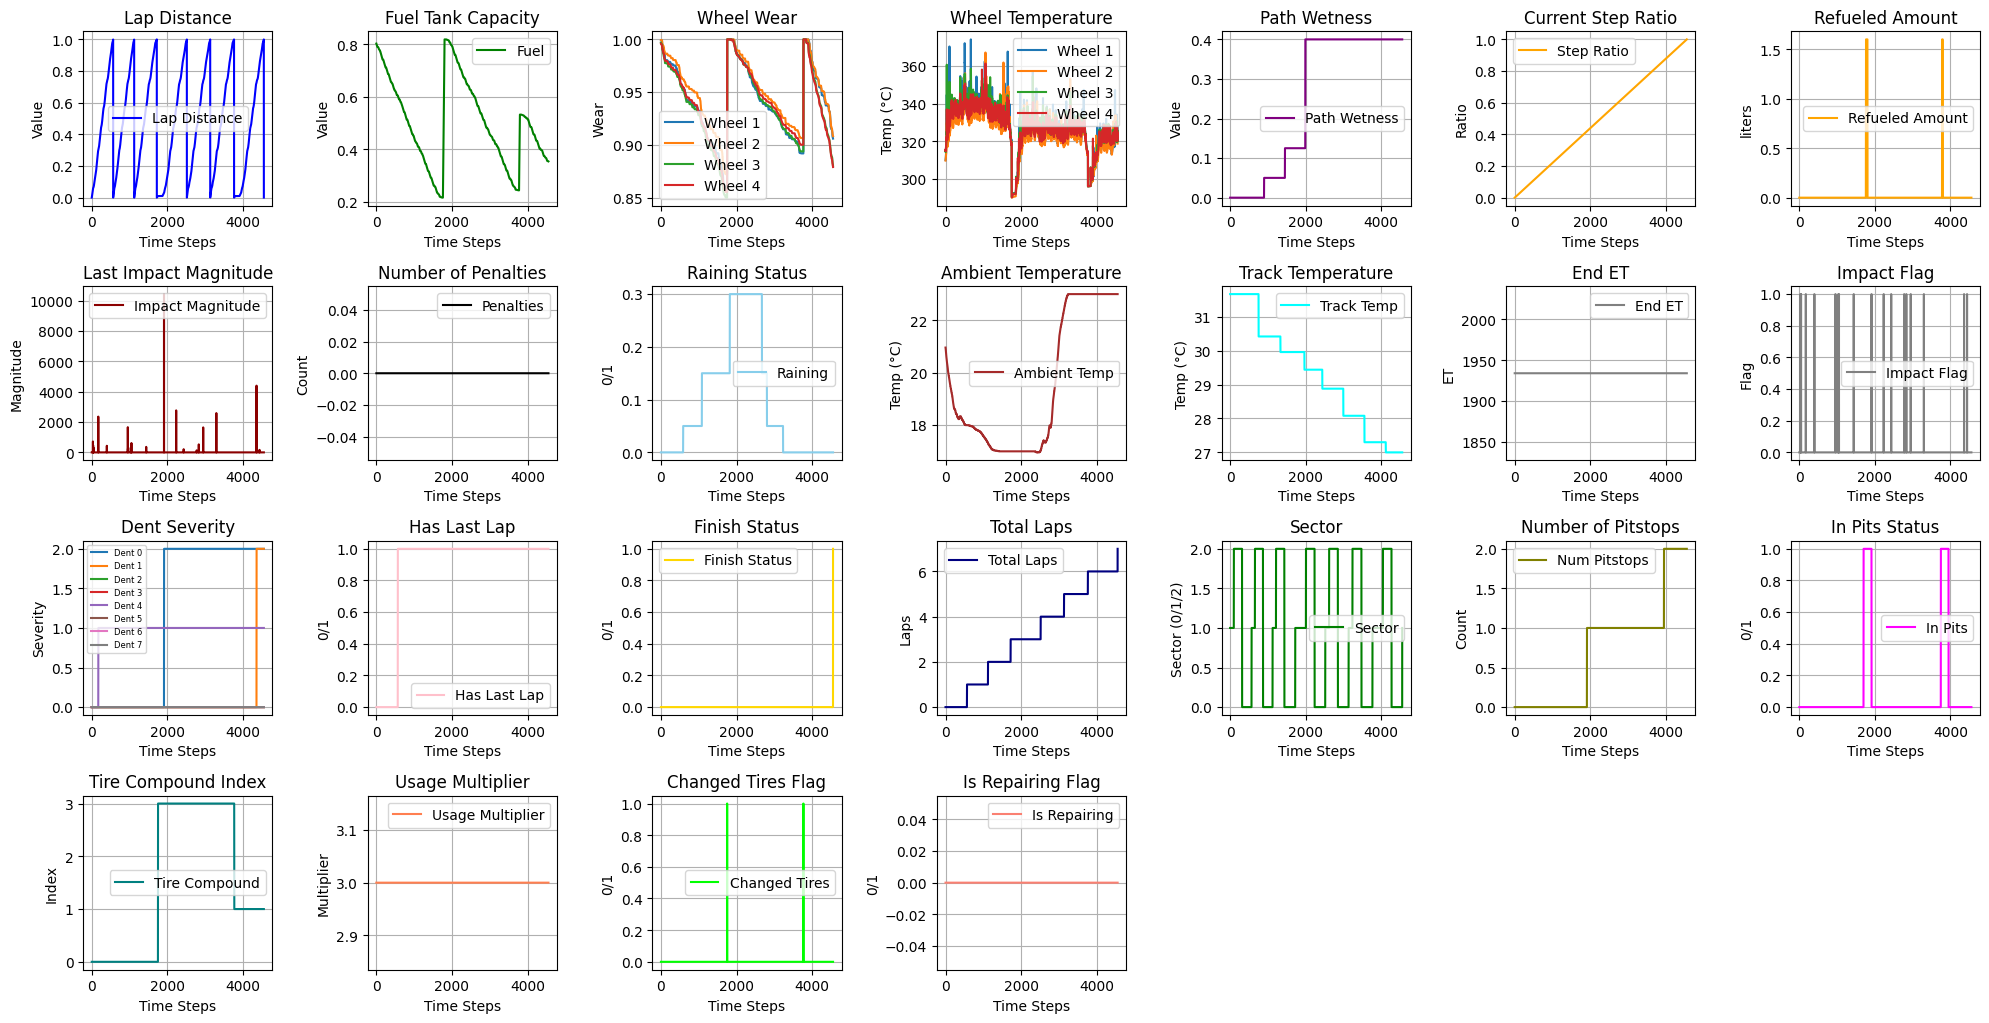

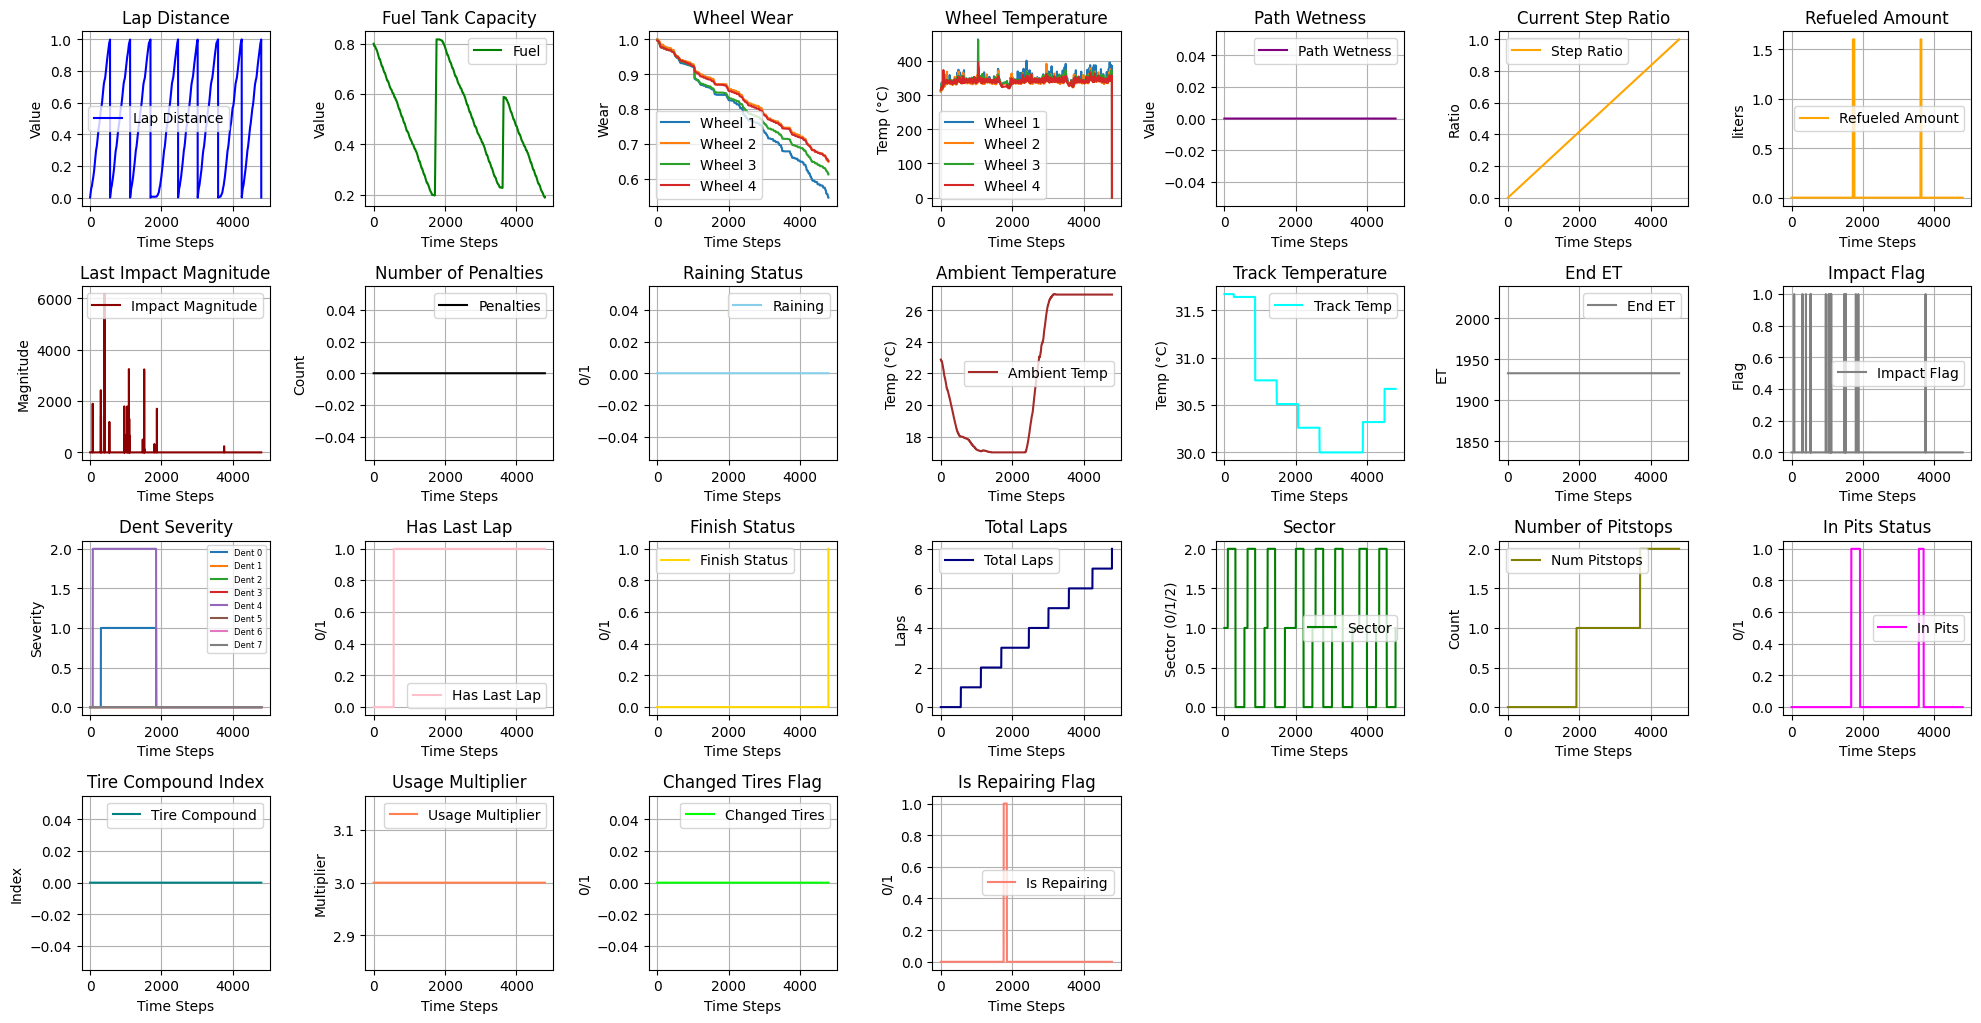

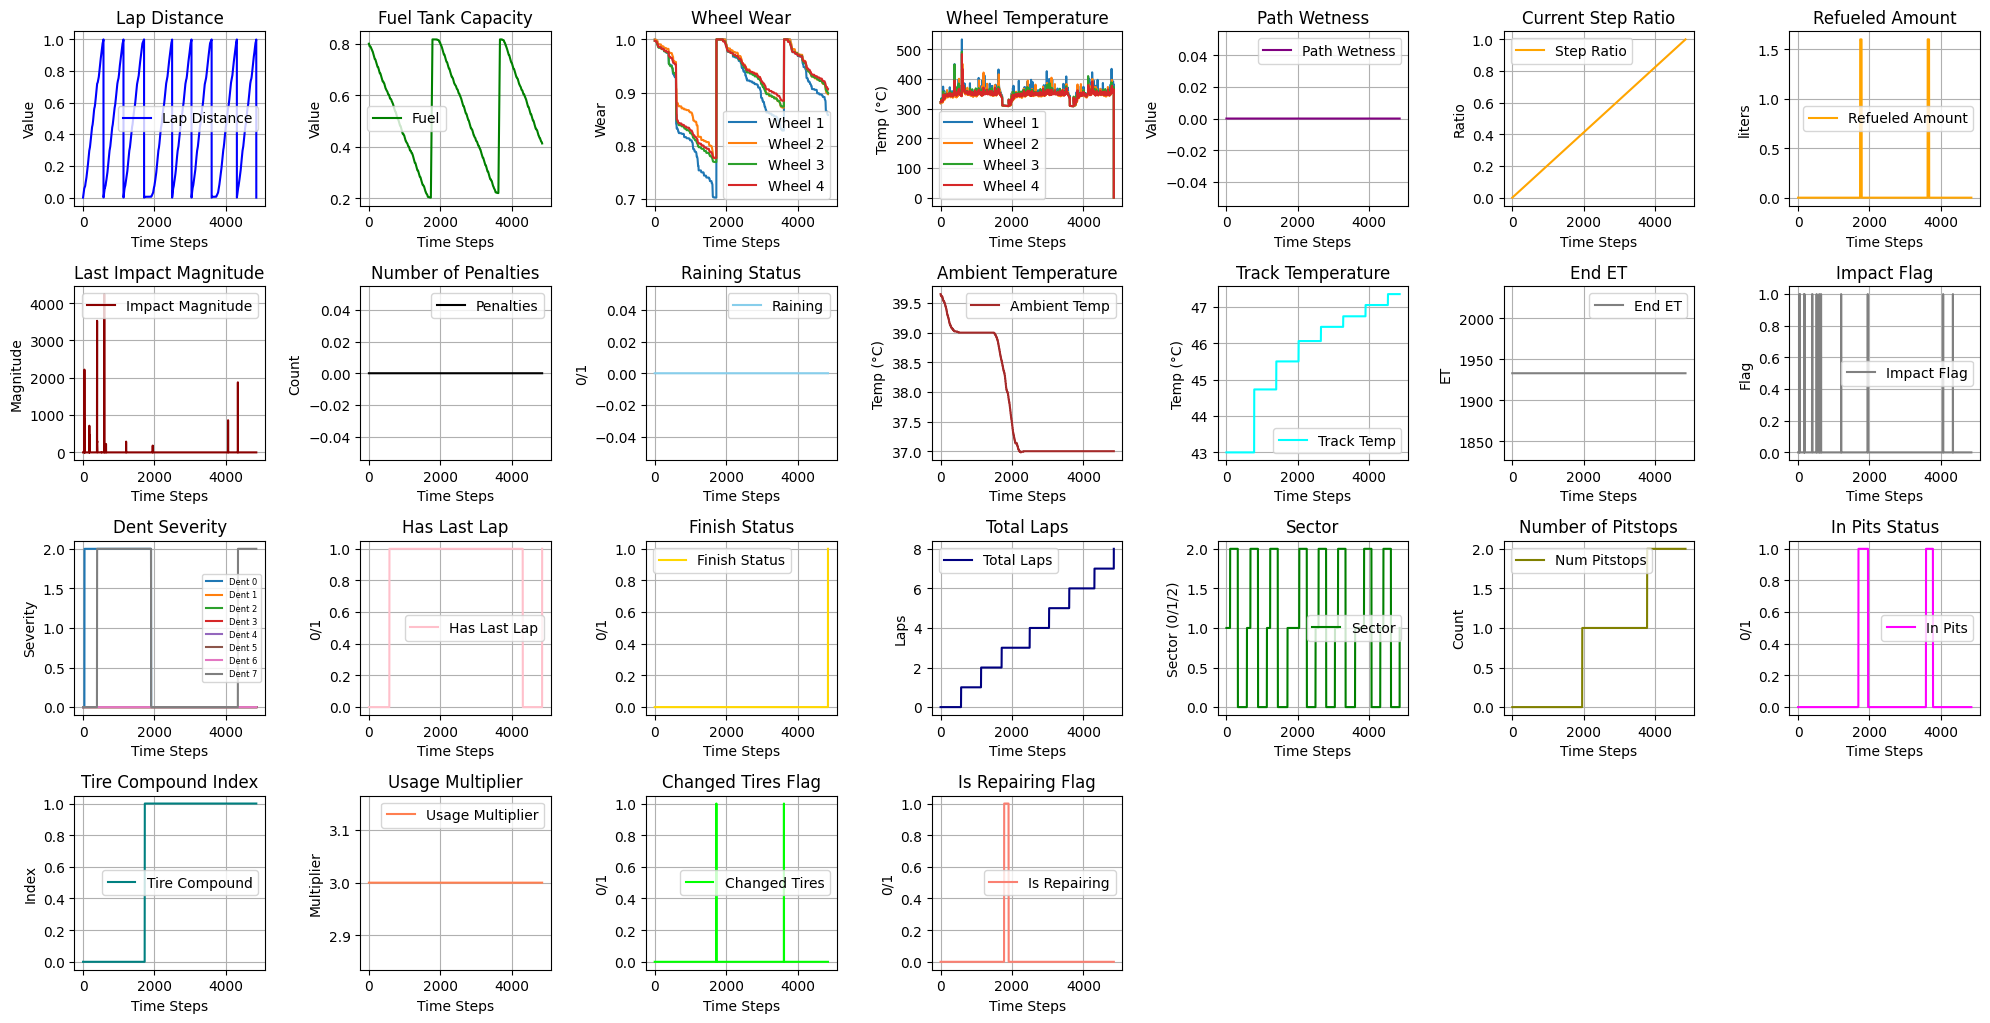

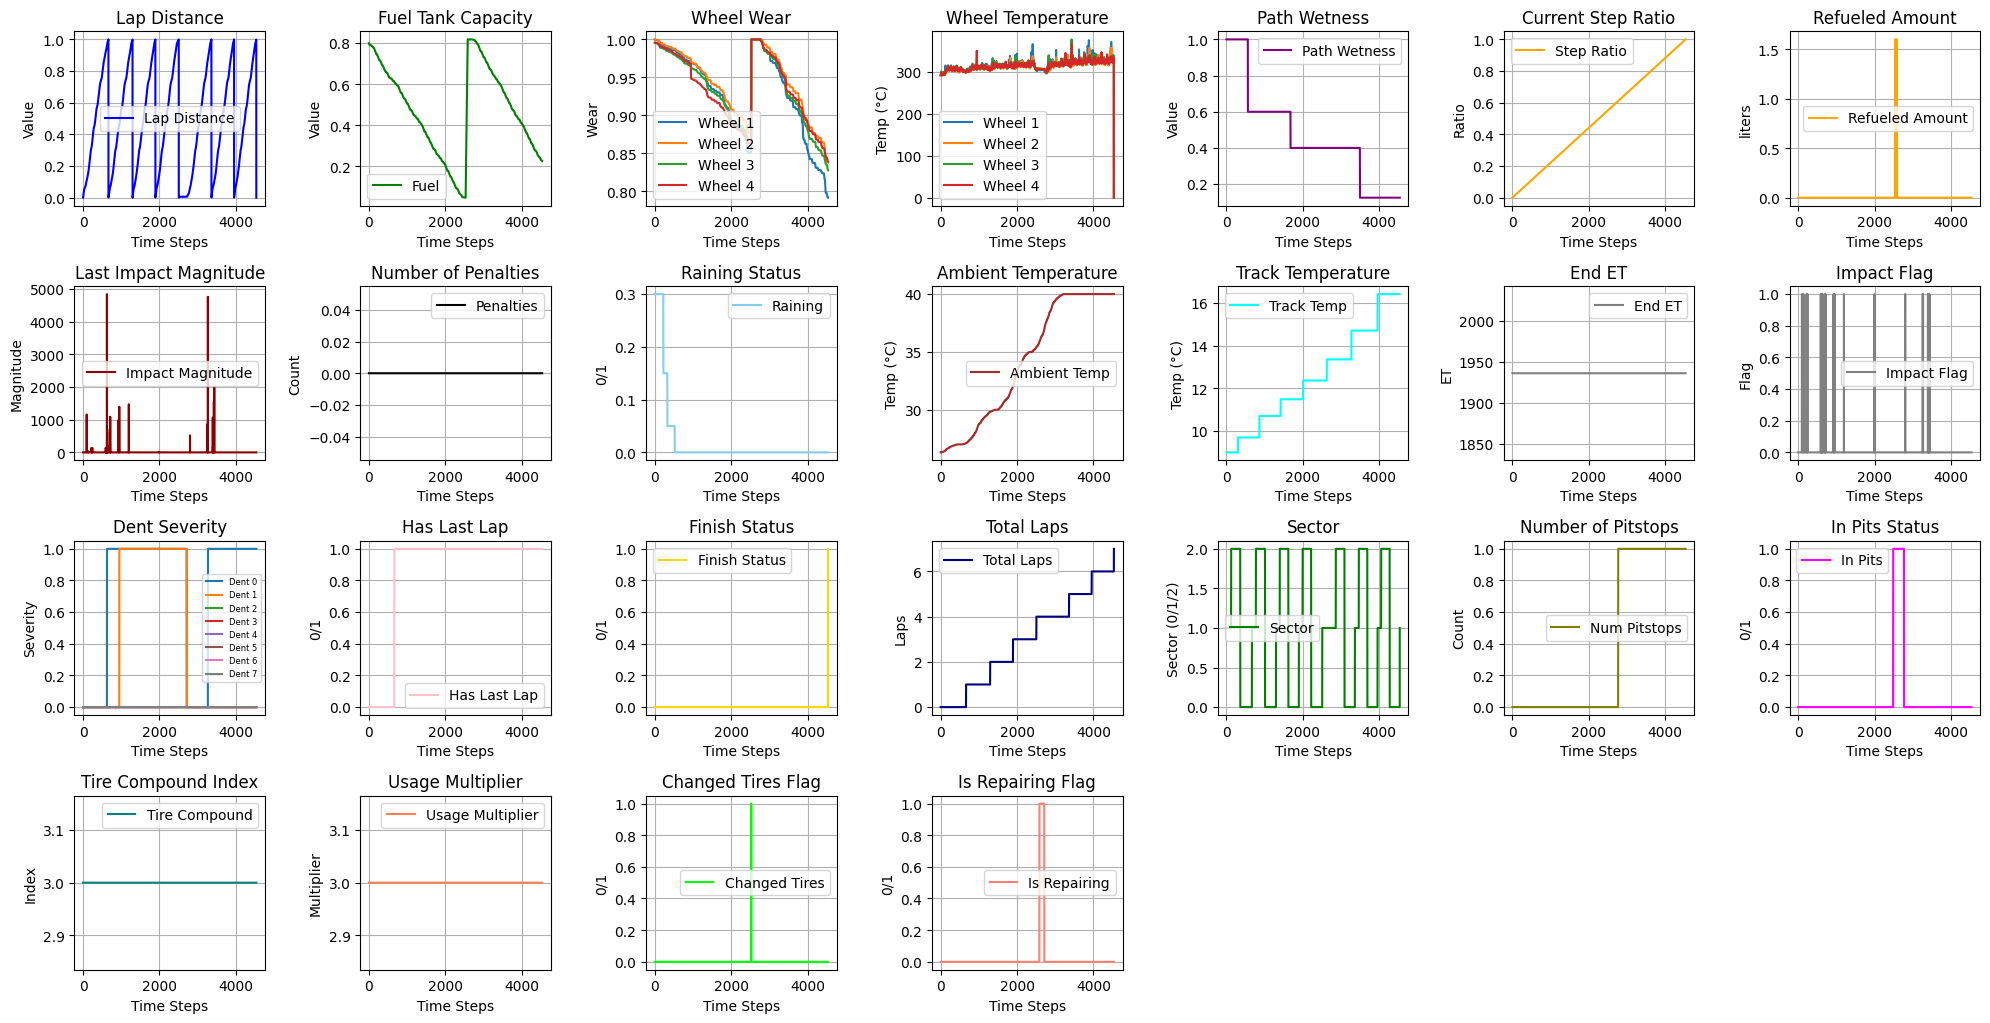

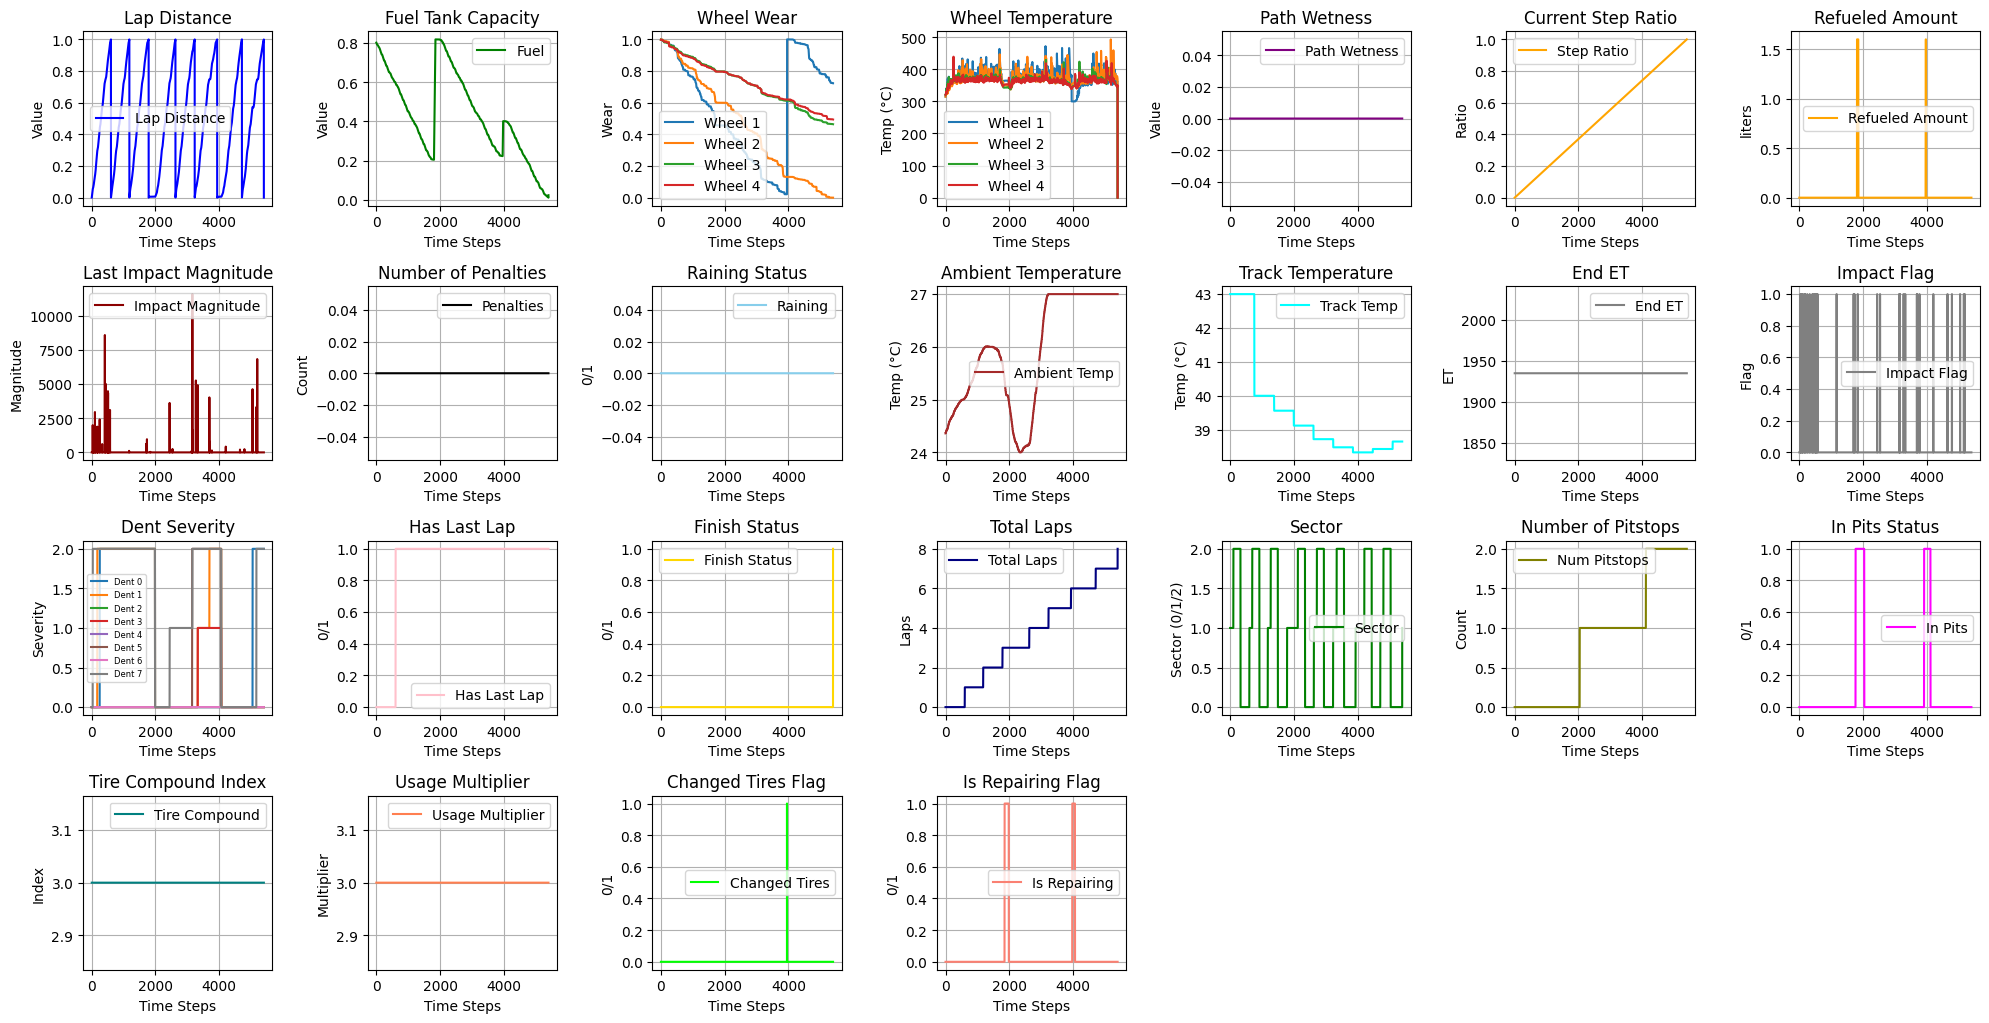

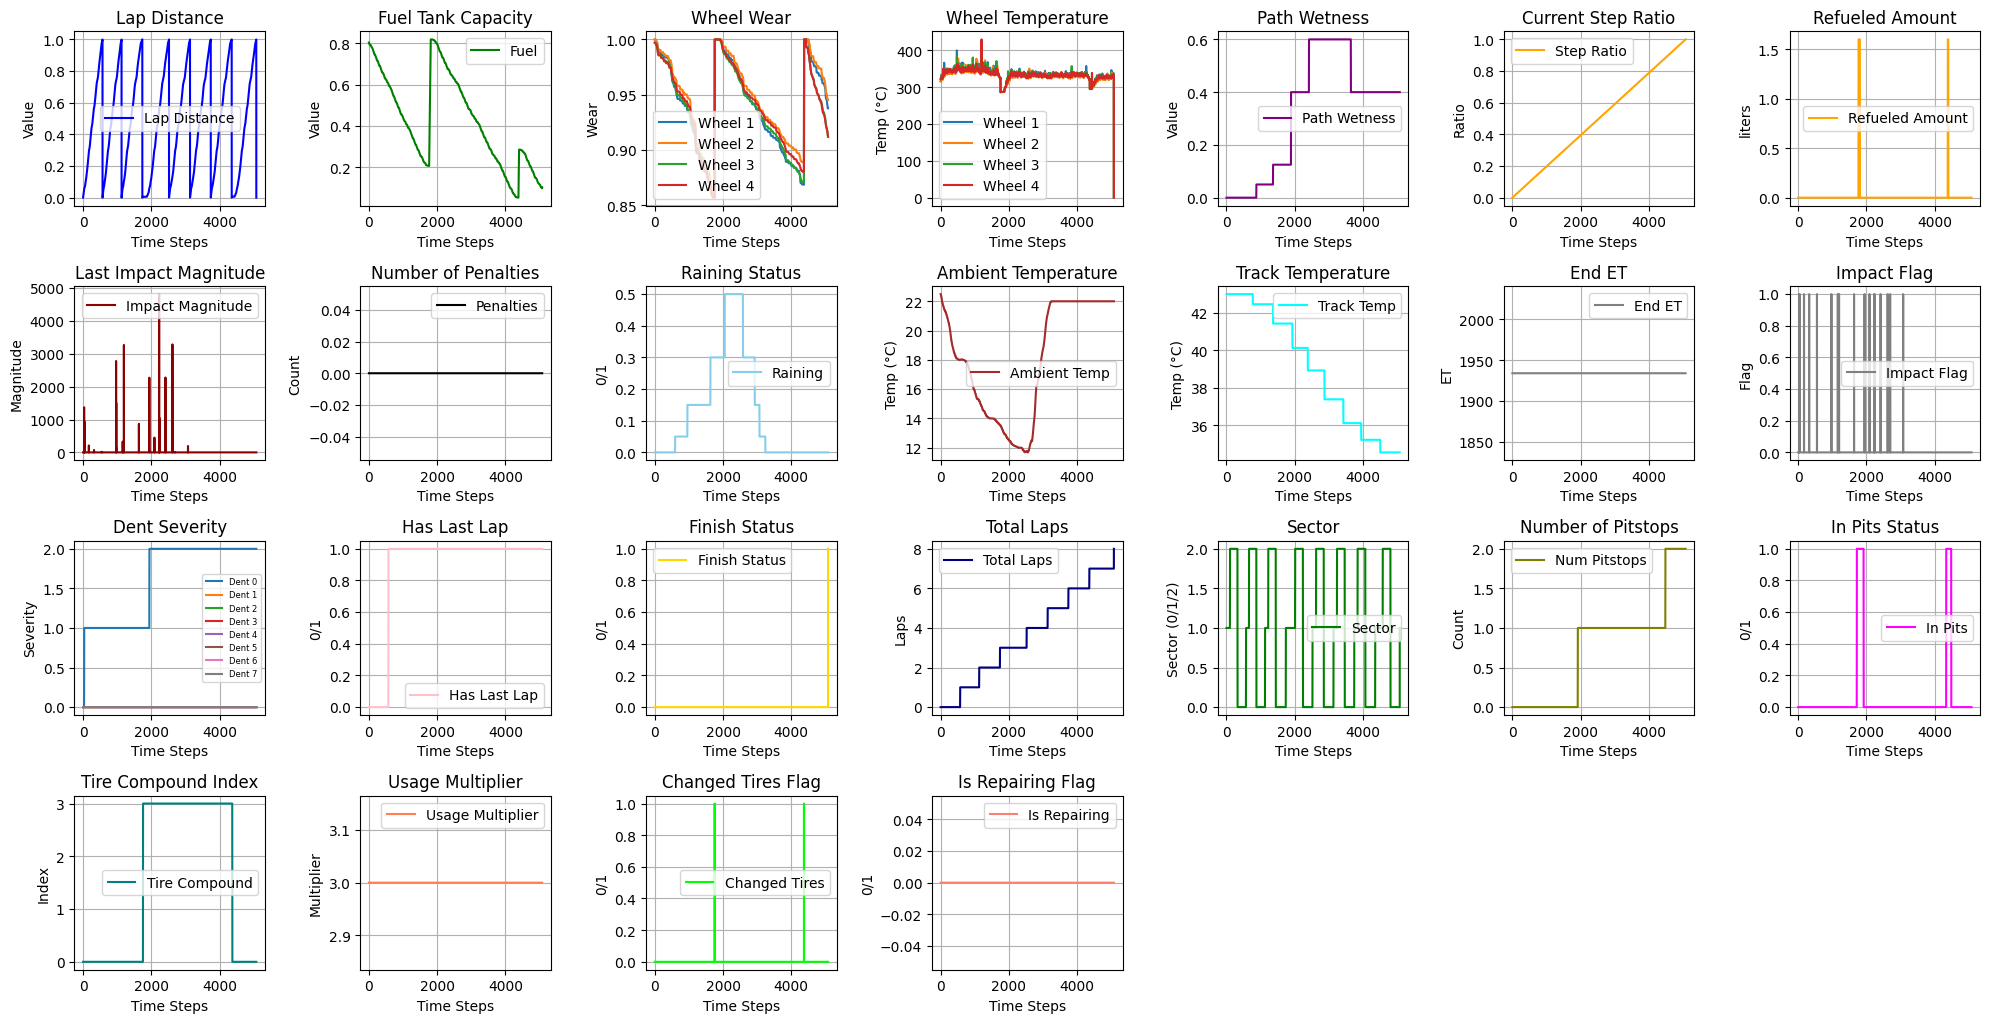

In [20]:
for race in data:
    make_plots(race)

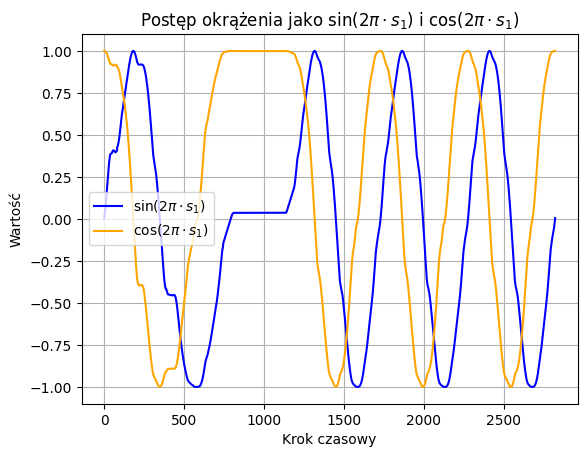

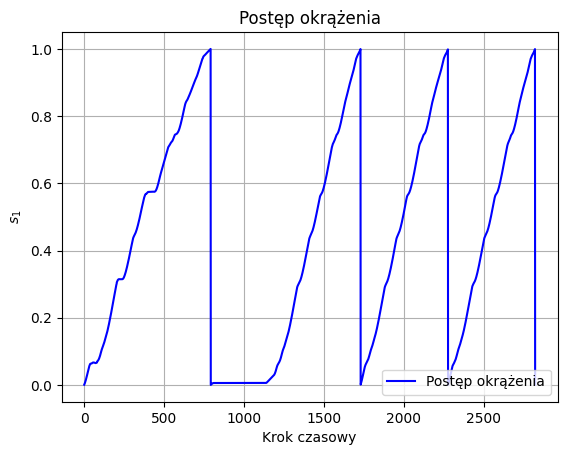

In [20]:
race_data = data[3]  # Wybierz pierwszy wyścig do analizy

history_array = np.array(race_data)
# for i in range(history_array.shape[0]):
    
#     LAP_DIST_norm = (np.atan2(history_array[i, 0],history_array[i, 1]) + 2 * np.pi) % (2 * np.pi) / (2 * np.pi)

#     history_array[i] = np.hstack((LAP_DIST_norm, history_array[i, 2:]))
radians = np.atan2(history_array[:, 0], history_array[:, 1]) 

# Normalize
LAP_DIST_norm_col = (radians + 2 * np.pi) % (2 * np.pi) / (2 * np.pi)

# Reshape to make it a column vector (N, 1)
LAP_DIST_norm_col = LAP_DIST_norm_col.reshape(-1, 1)

# 2. Horizontal stack the new column with the sliced original data
# This creates a NEW array with 38 columns (1 new + 37 old)

# Utworzenie większej figury dla wszystkich wykresów
# fig = plt.figure(figsize=(20, 15))

# 1. Lap Distance
# plt.subplot(6, 7, 1)
plt.plot(history_array[:, 0], label=r'$\sin(2\pi \cdot s_1)$', color='blue')
plt.plot(history_array[:, 1], label=r'$\cos(2\pi \cdot s_1)$', color='orange')

# Tytuł też musi mieć dolary obejmujące komendy \cdot i \pi
plt.title(r'Postęp okrążenia jako $\sin(2\pi \cdot s_1)$ i $\cos(2\pi \cdot s_1)$')
plt.xlabel('Krok czasowy')
plt.ylabel('Wartość')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(LAP_DIST_norm_col, label='Postęp okrążenia', color='blue')
plt.title('Postęp okrążenia')
plt.xlabel('Krok czasowy')
plt.ylabel(r'$s_1$')
plt.legend()
plt.grid(True)
plt.show()